# Bab. 9 Bekerja dengan Data

Kelompok 9:

Gustian [4112321002]

Kuncoro Adi Wibowo [4112321028]


*Experts often possess more data than judgment.*

—Colin Powell

Bekerja dengan data adalah seni dan ilmu pengetahuan. Kita telah membahas sebagian besar tentang bagian sains, namun dalam bab ini kita akan melihat beberapa bagian seni.



### Eksplorasi Data

Setelah Anda mengidentifikasi pertanyaan yang ingin Anda jawab dan mendapatkan beberapa data, Anda mungkin tergoda untuk terjun dan segera mulai membangun model dan mendapatkan jawaban. Tapi Anda harus menahan dorongan ini. Langkah pertama Anda adalah mengeksplorasi data Anda.


### Eksplorasi Data Dimensi Satu

Kasus yang paling sederhana adalah ketika Anda memiliki kumpulan data satu dimensi, yang hanya berupa kumpulan angka. Misalnya, ini bisa berupa jumlah rata-rata harian menit yang dihabiskan setiap pengguna di situs Anda, jumlah berapa kali setiap koleksi video tutorial ilmu data ditonton, atau jumlah halaman dari setiap buku ilmu data di perpustakaan ilmu data Anda.

Langkah pertama yang jelas adalah menghitung beberapa statistik ringkasan. Anda ingin mengetahui berapa banyak data data yang Anda miliki, titik terkecil, terbesar, rata-rata, dan standar deviasi.

Namun, ini pun belum tentu memberi Anda pemahaman yang baik. Langkah selanjutnya yang baik adalah membuat histogram, di mana Anda mengelompokkan data Anda ke dalam ember terpisah dan menghitung berapa banyak titik yang masuk ke dalam setiap ember:

In [ ]:
from typing import List, Dict
from collections import Counter
import math

import matplotlib.pyplot as plt

def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)

Sebagai contoh, pertimbangkan dua set data berikut ini:

In [ ]:
import random
from scratch.probability import inverse_normal_cdf

random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random())
          for _ in range(10000)]

Keduanya memiliki rata-rata mendekati 0 dan deviasi standar mendekati 58. Namun, keduanya memiliki distribusi yang sangat berbeda distribusi. Gambar 10-1 menunjukkan distribusi yang seragam:

In [ ]:
plot_histogram(uniform, 10, "Uniform Histogram")

sedangkan Gambar 10-2 menunjukkan distribusi normal:

In [ ]:
plot_histogram(normal, 10, "Normal Histogram")

Dalam kasus ini, kedua distribusi memiliki nilai maksimum dan minimum yang cukup berbeda, tetapi bahkan dengan mengetahui hal itu saja tidak cukup untuk sudah cukup untuk memahami perbedaannya.

### Dua Dimensi

Sekarang bayangkan Anda memiliki kumpulan data dengan dua dimensi. Mungkin selain menit harian yang Anda miliki tahun pengalaman ilmu data. Tentu saja Anda ingin memahami setiap dimensi secara individual. Namun, Anda mungkin juga ingin menyebarkan data tersebut.

Sebagai contoh, pertimbangkan dataset palsu lainnya:

In [ ]:
def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

Jika Anda menjalankan plot_histogram pada ys1 dan ys2, Anda akan mendapatkan plot yang terlihat serupa (memang, keduanya terdistribusi secara normal dengan rata-rata dan standar deviasi yang sama).

### Dimensi Banyak

Dengan banyak dimensi, Anda ingin tahu bagaimana semua dimensi berhubungan satu sama lain. Pendekatan sederhana adalah dengan melihat matriks korelasi, di mana entri pada baris i dan kolom j adalah korelasi antara dimensi ke-i dan dimensi ke-j data:

In [ ]:
from scratch.linear_algebra import Matrix, Vector, make_matrix
def correlation_matrix(data: List[Vector]) -> Matrix:
"""
Returns the len(data) x len(data) matrix whose (i, j)-th entry

is the correlation between data[i] and data[j]
"""
def correlation_ij(i: int, j: int) -> float:
return correlation(data[i], data[j])
return make_matrix(len(data), len(data), correlation_ij)

Pendekatan yang lebih visual (jika Anda tidak memiliki terlalu banyak dimensi) adalah membuat matriks scatterplot (Gambar 10-4) yang menunjukkan semua scatterplot berpasangan. Untuk melakukan itu kita akan menggunakan plt.subplots, yang memungkinkan kita untuk membuat subplot dari bagan kita. Kami memberikannya jumlah baris dan jumlah kolom, dan itu mengembalikan objek gambar (yang tidak akan kami gunakan) dan array dua dimensi objek sumbu (masing-masing akan kami plot):

In [ ]:
# corr_data is a list of four 100-d vectors
num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):

        # Scatter column_j on the x-axis vs. column_i on the y-axis
        if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])

        # unless i == j, in which case show the series name
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                xycoords='axes fraction',
                                ha="center", va="center")

        # Then hide axis labels except left and bottom charts
        if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)

# Fix the bottom-right and top-left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()

Melihat scatterplot, Anda dapat melihat bahwa seri 1 berkorelasi sangat negatif dengan seri 0, seri 2 berkorelasi positif dengan seri 1, dan seri 3 hanya mengambil nilai 0 dan 6, dengan 0 sesuai dengan nilai kecil seri 2 dan 6 sesuai dengan nilai besar. Ini adalah cara cepat untuk mendapatkan gambaran kasar tentang variabel mana yang berkorelasi (kecuali jika Anda menghabiskan berjam-jam mengutak-atik matplotlib untuk menampilkan hal-hal persis seperti yang Anda inginkan, dalam hal ini bukan cara cepat).

### Menggunakan NamedTuples

Salah satu cara umum untuk merepresentasikan data adalah menggunakan dikte:

In [ ]:
import datetime

stock_price = {'closing_price': 102.06,
              'date': datetime.date(2014, 8, 29),
              'symbol': 'AAPL'}

Namun, ada beberapa alasan mengapa ini kurang ideal. Ini adalah representasi yang sedikit tidak efisien (dikte melibatkan beberapa overhead), sehingga jika Anda memiliki banyak harga saham, mereka akan mengambil lebih banyak memori daripada yang seharusnya. Sebagian besar, ini adalah pertimbangan kecil.

Masalah yang lebih besar adalah bahwa mengakses hal-hal dengan kunci dict rawan kesalahan. Kode berikut akan berjalan tanpa kesalahan dan hanya melakukan hal yang salah:

In [ ]:
# oops, typo
stock_price['cosing_price'] = 103.06

Akhirnya, sementara kita dapat mengetik-membubuhi keterangan kamus seragam:

In [ ]:
prices: Dict[datetime.date, float] = {}

Tidak ada cara yang berguna untuk membuat anotasi kamus sebagai data yang memiliki banyak tipe nilai yang berbeda. Jadi kita juga kehilangan kekuatan petunjuk tipe.

Sebagai alternatif, Python menyertakan kelas namedtuple, yang seperti tupel tetapi dengan slot bernama:

In [ ]:
from collections import namedtuple

StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03

Seperti tupel biasa, tupel bernama tidak dapat diubah, yang berarti Anda tidak dapat mengubah nilainya setelah dibuat. Kadang-kadang ini akan menghalangi kita, tetapi sebagian besar itu hal yang baik.

Anda akan melihat bahwa kami masih belum menyelesaikan masalah anotasi jenis. Kami melakukannya dengan menggunakan varian yang diketik, NamedTuple:

In [ ]:
from typing import NamedTuple

class StockPrice(NamedTuple):
      symbol: str
      date: datetime.date
      closing_price: float

      def is_high_tech(self) -> bool:
          """It's a class, so we can add methods too"""
          return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

Dan sekarang editor Anda dapat membantu Anda, seperti yang ditunjukkan pada Gambar 10-5.

### Kelas data

Dataclass adalah (semacam) versi NamedTuple yang bisa berubah. (Saya katakan "semacam" karena NamedTuples mewakili data mereka secara kompak sebagai tupel, sedangkan dataclass adalah kelas Python biasa yang hanya menghasilkan beberapa metode untuk Anda secara otomatis.)

NOTE : Dataclass baru di Python 3.7. Jika Anda menggunakan versi yang lebih lama, bagian ini tidak akan berfungsi untuk Anda.

Sintaksnya sangat mirip dengan NamedTuple. Tetapi alih-alih mewarisi dari kelas dasar, kami menggunakan dekorator:

In [ ]:
from dataclasses import dataclass

@dataclass
class StockPrice2:
      symbol: str
      date: datetime.date
      closing_price: float

def is_high_tech(self) -> bool:
    """It's a class, so we can add methods too"""
    return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price2 = StockPrice2('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price2.symbol == 'MSFT'
assert price2.closing_price == 106.03
assert price2.is_high_tech()

Seperti disebutkan, perbedaan besar adalah kita dapat memodifikasi nilai instance dataclass:

In [ ]:
# stock split
price2.closing_price /= 2
assert price2.closing_price == 51.03

Jika kita mencoba memodifikasi bidang versi NamedTuple, kita akan mendapatkan `AttributeError`.

Ini juga membuat kita rentan terhadap jenis kesalahan yang ingin kita hindari dengan tidak menggunakan `dicts`:

In [ ]:
# It's a regular class, so add new fields however you like!
price2.cosing_price = 75 # oops

Kami tidak akan menggunakan kelas data, tetapi Anda mungkin menemukannya di alam liar.

### Cleaning and Munging

Data dunia nyata itu *kotor*. Seringkali Anda harus melakukan beberapa pekerjaan sebelum Anda dapat menggunakannya. Kita melihat contoh-contoh ini dalam Bab 9. Kita harus mengubah string menjadi `floats` atau `ints` sebelum kita dapat menggunakannya. Kita harus memeriksa nilai yang hilang dan pencilan dan data yang buruk.

Sebelumnya, kami melakukannya tepat sebelum menggunakan data:

In [ ]:
closing_price = float(row[2])

Tetapi mungkin kurang rawan kesalahan untuk melakukan penguraian dalam fungsi yang dapat kita uji:

In [ ]:
from dateutil.parser import parse

def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(symbol=symbol,
                      date=parse(date).date(),
                      closing_price=float(closing_price))

# Now test our function
stock = parse_row(["MSFT", "2018-12-14", "106.03"])

assert stock.symbol == "MSFT"
assert stock.date == datetime.date(2018, 12, 14)
assert stock.closing_price == 106.03

Bagaimana jika ada data yang buruk? Nilai "float" yang sebenarnya tidak mewakili angka? Mungkin Anda lebih suka mendapatkan Tidak Ada daripada merusak program Anda?

In [ ]:
from typing import Optional
import re

def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row

    # Stock symbol should be all capital letters
    if not re.match(r"^[A-Z]+$", symbol):
        return None

    try:
        date = parse(date_).date()
    except ValueError:
        return None

    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None

    return StockPrice(symbol, date, closing_price)

# Should return None for errors
assert try_parse_row(["MSFT0", "2018-12-14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12--14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12-14", "x"]) is None

# But should return same as before if data is good
assert try_parse_row(["MSFT", "2018-12-14", "106.03"]) == stock

Misalnya, jika kita memiliki harga saham yang dipisahkan koma dengan data buruk:

```
AAPL,6/20/2014,90.91
MSFT,6/20/2014,41.68
FB,6/20/3014,64.5
AAPL,6/19/2014,91.86
MSFT,6/19/2014,n/a
FB,6/19/2014,64.34
```

Kita sekarang dapat membaca dan mengembalikan hanya baris yang valid:

In [ ]:
import csv

data: List[StockPrice] = []

with open("comma_delimited_stock_prices.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        maybe_stock = try_parse_row(row)
        if maybe_stock is None:
            print(f"skipping invalid row: {row}")
        else:
            data.append(maybe_stock)

dan putuskan apa yang ingin kami lakukan terhadap yang tidak valid. Secara umum, tiga opsi adalah menyingkirkannya, kembali ke sumbernya dan mencoba memperbaiki data yang buruk/hilang, atau tidak melakukan apa-apa dan menyilangkan jari kita. Jika ada satu baris buruk dari jutaan, mungkin tidak apa-apa untuk mengabaikannya. Tetapi jika setengah baris Anda memiliki data yang buruk, itu adalah sesuatu yang perlu Anda perbaiki.

Langkah selanjutnya yang baik adalah memeriksa pencilan, menggunakan teknik dari "Menjelajahi Data Anda" atau dengan menyelidiki secara ad hoc. Misalnya, apakah Anda memperhatikan bahwa salah satu tanggal dalam file saham memiliki tahun 3014? Itu tidak akan (harus) memberi Anda kesalahan, tetapi itu sangat jelas salah, dan Anda akan mendapatkan hasil yang kacau jika Anda tidak menangkapnya. Kumpulan data dunia nyata memiliki titik desimal yang hilang, nol ekstra, kesalahan ketik, dan banyak masalah lain yang harus Anda tangkap. (Mungkin itu bukan pekerjaan resmi Anda, tetapi siapa lagi yang akan melakukannya?)

### Memanipulasi Data

Salah satu keterampilan terpenting seorang ilmuwan data adalah *memanipulasi data*. Ini lebih merupakan pendekatan umum daripada teknik tertentu, jadi kami hanya akan bekerja melalui beberapa contoh untuk memberi Anda rasanya.

Bayangkan kita memiliki banyak data harga saham yang terlihat seperti ini:

In [ ]:
data = [
    StockPrice(symbol='MSFT',
              date=datetime.date(2018, 12, 24),
              closing_price=106.03),
    # ...
]

Mari kita mulai mengajukan pertanyaan tentang data ini. Sepanjang jalan kita akan mencoba untuk memperhatikan pola dalam apa yang kita lakukan dan abstrak keluar beberapa alat untuk membuat manipulasi lebih mudah.

Misalnya, kita ingin mengetahui harga penutupan tertinggi yang pernah ada untuk AAPL. Mari kita uraikan ini menjadi langkah-langkah konkret:
1. Batasi diri Anda pada AAPLrows.
2. Ambil closing_price dari setiap baris.
3. Ambil maksimal dari harga tersebut.

Kita dapat melakukan ketiganya sekaligus dengan menggunakan pemahaman:

In [ ]:
max_aapl_price = max(stock_price.closing_price
                    for stock_price in data
                    if stock_price.symbol == "AAPL")

Secara lebih umum, kita mungkin ingin mengetahui harga penutupan tertinggi yang pernah ada untuk setiap saham dalam dataset kita. Salah satu cara untuk melakukannya adalah:
1. Buat dict untuk melacak harga tertinggi (kita akan menggunakan defaultdict yang mengembalikan minus tak terhingga untuk nilai yang hilang, karena harga apa pun akan lebih besar dari itu).
2. Iterasi atas data kami, perbarui.

Berikut kodenya:

In [ ]:
from collections import defaultdict

max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))

for sp in data:
    symbol, closing_price = sp.symbol, sp.closing_price
    if closing_price > max_prices[symbol]:
        max_prices[symbol] = closing_price

Kita sekarang dapat mulai menanyakan hal-hal yang lebih rumit, seperti apa perubahan persen satu hari terbesar dan terkecil dalam dataset kita. Perubahan persen adalah price_today / price_yesterday - 1, yang berarti kita perlu beberapa cara untuk mengaitkan harga hari ini dan harga kemarin. Salah satu pendekatan adalah mengelompokkan harga berdasarkan simbol, dan kemudian, dalam setiap kelompok:
1. Pesan harga berdasarkan tanggal.
2. Gunakan zip untuk mendapatkan pasangan (sebelumnya, saat ini).
3. Ubah pasangan menjadi baris "persen perubahan" baru.


Mari kita mulai dengan mengelompokkan harga berdasarkan simbol:


In [ ]:
from typing import List
from collections import defaultdict

# Collect the prices by symbol
prices: Dict[str, List[StockPrice]] = defaultdict(list)

for sp in data:
    prices[sp.symbol].append(sp)

Karena harganya tupel, mereka akan diurutkan berdasarkan bidangnya secara berurutan: pertama berdasarkan simbol, lalu berdasarkan tanggal, lalu berdasarkan harga. Ini berarti bahwa jika kita memiliki beberapa harga semua dengan simbol yang sama, urutkan akan mengurutkannya berdasarkan tanggal (dan kemudian berdasarkan harga, yang tidak melakukan apa-apa, karena kita hanya memiliki satu per tanggal), itulah yang kita inginkan.

In [ ]:
# Order the prices by date
prices = {symbol: sorted(symbol_prices)
          for symbol, symbol_prices in prices.items()}

yang dapat kita gunakan untuk menghitung urutan perubahan hari-ke-hari:

In [ ]:
def pct_change(yesterday: StockPrice, today: StockPrice) -> float:
    return today.closing_price / yesterday.closing_price - 1

class DailyChange(NamedTuple):
      symbol: str
      date: datetime.date
      pct_change: float

def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
    """
    Assumes prices are for one stock and are in order
    """
    return [DailyChange(symbol=today.symbol,
            date=today.date,
            pct_change=pct_change(yesterday, today))
            for yesterday, today in zip(prices, prices[1:])]

dan kemudian kumpulkan semuanya:

In [ ]:
all_changes = [change
              for symbol_prices in prices.values()
              for change in day_over_day_changes(symbol_prices)]

Pada titik mana mudah untuk menemukan yang terbesar dan terkecil:

In [ ]:
max_change = max(all_changes, key=lambda change: change.pct_change)
# see e.g. http://news.cnet.com/2100-1001-202143.html
assert max_change.symbol == 'AAPL'
assert max_change.date == datetime.date(1997, 8, 6)
assert 0.33 < max_change.pct_change < 0.34

min_change = min(all_changes, key=lambda change: change.pct_change)
# see e.g. http://money.cnn.com/2000/09/29/markets/techwrap/
assert min_change.symbol == 'AAPL'
assert min_change.date == datetime.date(2000, 9, 29)
assert -0.52 < min_change.pct_change < -0.51

Kita sekarang dapat menggunakan dataset `all_changes` baru ini untuk menemukan bulan mana yang terbaik untuk berinvestasi di saham teknologi. Kita hanya akan melihat perubahan harian rata-rata berdasarkan bulan:

In [ ]:
changes_by_month: List[DailyChange] = {month: [] for month in range(1, 13)}

for change in all_changes:
    changes_by_month[change.date.month].append(change)

avg_daily_change = {
    month: sum(change.pct_change for change in changes) / len(changes)
    for month, changes in changes_by_month.items()
}

# October is the best month
assert avg_daily_change[10] == max(avg_daily_change.values())

Kami akan melakukan manipulasi semacam ini di seluruh buku, biasanya tanpa meminta terlalu banyak perhatian eksplisit kepada mereka.

### Penskalaan ulang

Banyak teknik yang sensitif terhadap skala data Anda. Misalnya, bayangkan Anda memiliki kumpulan data yang terdiri dari tinggi dan berat ratusan ilmuwan data, dan Anda mencoba mengidentifikasi kelompok ukuran tubuh.

Secara intuitif, kami ingin cluster untuk mewakili titik-titik dekat satu sama lain, yang berarti bahwa kita memerlukan beberapa gagasan tentang jarak antar titik. Kita sudah memiliki fungsi jarak Euclidean, jadi pendekatan alami mungkin memperlakukan pasangan (tinggi, berat) sebagai titik dalam ruang dua dimensi. Perhatikan orang-orang yang tercantum dalam Tabel 10-1.

Tabel 10-1. Ketinggian dan bobot

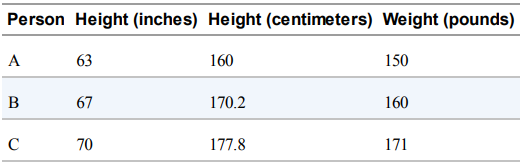

Jika kita mengukur tinggi dalam inci, maka tetangga terdekat B adalah A:

In [ ]:
from scratch.linear_algebra import distance

a_to_b = distance([63, 150], [67, 160]) # 10.77
a_to_c = distance([63, 150], [70, 171]) # 22.14
b_to_c = distance([67, 160], [70, 171]) # 11.40

Namun, jika kita mengukur tinggi badan dalam sentimeter, maka tetangga terdekat B adalah C:

In [ ]:
a_to_b = distance([160, 150], [170.2, 160]) # 14.28
a_to_c = distance([160, 150], [177.8, 171]) # 27.53
b_to_c = distance([170.2, 160], [177.8, 171]) # 13.37

Tentu saja, ini merupakan masalah jika mengubah unit dapat mengubah hasil seperti ini. Untuk alasan ini, ketika dimensi tidak sebanding satu sama lain, kami terkadang akan mengubah skala data kami sehingga setiap dimensi memiliki rata-rata 0 dan deviasi standar 1. Hal ini secara efektif menghilangkan unit, mengubah setiap dimensi menjadi "deviasi standar dari rata-rata."

Untuk memulainya, kita perlu menghitung mean dan standar_deviasi untuk setiap posisi:

In [ ]:
from typing import Tuple

from scratch.linear_algebra import vector_mean
from scratch.statistics import standard_deviation

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """returns the mean and standard deviation for each position"""
    dim = len(data[0])
    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
              for i in range(dim)]

    return means, stdevs

vectors = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
means, stdevs = scale(vectors)
assert means == [-1, 0, 1]
assert stdevs == [2, 1, 0]

Kita kemudian dapat menggunakannya untuk membuat set data baru:

In [ ]:
def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has
    mean 0 and standard deviation 1. (Leaves a position
    as is if its standard deviation is 0.)
    """
    dim = len(data[0])
    means, stdevs = scale(data)

    # Make a copy of each vector
    rescaled = [v[:] for v in data]

    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]
return rescaled

Tentu saja, mari kita menulis tes untuk menyesuaikan agar rescale melakukan apa yang menurut kita seharusnya:

In [ ]:
means, stdevs = scale(rescale(vectors))
assert means == [0, 0, 1]
assert stdevs == [1, 1, 0]

## Selain: tqdm

Sering kali kita akan melakukan komputasi yang memakan waktu lama. Saat Anda melakukan pekerjaan seperti itu, Anda ingin mengetahui bahwa Anda membuat kemajuan dan berapa lama Anda harus menunggu.

Salah satu cara untuk melakukan ini adalah dengan pustaka tqdm, yang menghasilkan bilah kemajuan khusus. Kita akan menggunakannya di sepanjang sisa buku ini, jadi mari kita gunakan kesempatan ini untuk mempelajari cara kerjanya.

Untuk memulainya, Anda harus menginstalnya:

In [ ]:
python -m pip install tqdm

Hanya ada beberapa fitur yang perlu Anda ketahui. Yang pertama adalah bahwa iterable yang dibungkus dengan tqdm.tqdm akan menghasilkan sebuah progress bar:

In [ ]:
import tqdm

for i in tqdm.tqdm(range(100)):
    # do something slow
    _ = [random.random() for _ in range(1000000)]

yang menghasilkan keluaran yang terlihat seperti ini:

56%|████████████████████ | 56/100 [00:08<00:06, 6.49it/s]

Secara khusus, ini menunjukkan kepada Anda berapa bagian dari loop Anda yang telah selesai (meskipun ini tidak dapat dilakukan jika Anda menggunakan generator), berapa lama perulangan tersebut telah berjalan, dan berapa lama perulangan tersebut akan berjalan.

Dalam kasus ini (di mana kita hanya membungkus pemanggilan ke range) Anda dapat menggunakan tqdm.trange.

Anda juga dapat mengatur deskripsi bilah kemajuan saat sedang berjalan. Untuk melakukan itu, Anda perlu menangkap iterator tqdm dalam pernyataan with:

In [ ]:
from typing import List

def primes_up_to(n: int) -> List[int]:
    primes = [2]
    with tqdm.trange(3, n) as t:
        for i in t:
            # i is prime if no smaller prime divides it
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)
            t.set_description(f"{len(primes)} primes")

    return primes

my_primes = primes_up_to(100_000)

Ini menambahkan deskripsi seperti berikut ini, dengan penghitung yang diperbarui saat bilangan prima baru ditemukan:

5116 bilangan prima: 50%|████████ | 49529/99997 [00:03<00:03, 15905.90it/s]

Menggunakan tqdm terkadang akan membuat kode Anda tidak mulus - terkadang layar menggambar ulang dengan buruk, dan terkadang perulangan akan berhenti. Dan jika Anda secara tidak sengaja membungkus perulangan tqdm di dalam perulangan tqdm lainnya lain, hal-hal aneh bisa saja terjadi. Namun, biasanya manfaatnya lebih besar daripada kerugiannya, jadi kita akan mencoba menggunakannya kapanpun kita memiliki komputasi yang berjalan lambat.

## Pengurangan Dimensi

Kadang-kadang dimensi data yang "sebenarnya" (atau yang berguna) mungkin tidak sesuai dengan dimensi yang kita miliki. Sebagai contoh, perhatikan kumpulan data yang digambarkan pada Gambar 10-6.

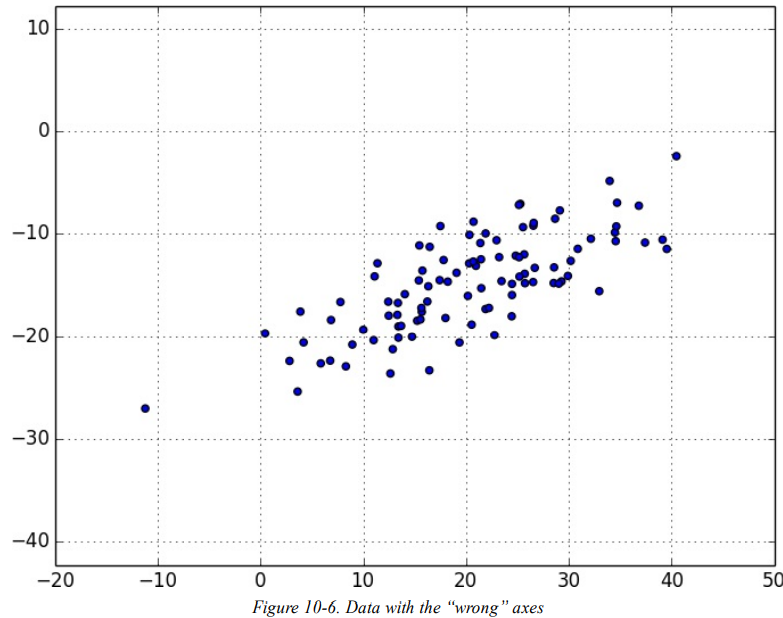

Sebagian besar variasi dalam data tampaknya berada di sepanjang satu dimensi yang tidak sesuai dengan sumbu x atau sumbu y.

Jika demikian, kita dapat menggunakan teknik yang disebut analisis komponen utama (PCA) untuk mengekstrak satu atau lebih dimensi yang menangkap sebanyak mungkin variasi dalam data.

**CATATAN**

Dalam praktiknya, Anda tidak akan menggunakan teknik ini pada dataset berdimensi rendah. Pengurangan dimensi sebagian besar berguna ketika dataset Anda memiliki sejumlah besar dimensi dan Anda ingin menemukan subset kecil yang menangkap sebagian besar variasi. Sayangnya, kasus tersebut sulit untuk diilustrasikan dalam format buku dua dimensi.

Sebagai langkah pertama, kita perlu menerjemahkan data sehingga setiap dimensi memiliki rata-rata 0:

In [ ]:
from scratch.linear_algebra import subtract

def de_mean(data: List[Vector]) -> List[Vector]:
    """Recenters the data to have mean 0 in every dimension"""
    mean = vector_mean(data)
    return [subtract(vector, mean) for vector in data]

(Jika kita tidak melakukan hal ini, teknik kita cenderung mengidentifikasi rata-rata itu sendiri daripada variasi dalam data). data).

Sekarang, diberikan matriks de-meaned X, kita dapat menanyakan arah mana yang menangkap varians terbesar dalam data.

Secara khusus, diberikan sebuah arah d (sebuah vektor yang besarnya 1), setiap baris x dalam matriks memperluas titik (x, d) dalam arah d. Dan setiap vektor bukan nol w menentukan arah jika kita mengubah ukurannya menjadi besarnya 1:

In [ ]:
from scratch.linear_algebra import magnitude
def direction(w: Vector) -> Vector:
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

Oleh karena itu, dengan vektor w yang bukan nol, kita dapat menghitung varians dataset kita ke arah yang ditentukan oleh w:

In [ ]:
from scratch.linear_algebra import dot

def directional_variance(data: List[Vector], w: Vector) -> float:
    """
    Returns the variance of x in the direction of w
    """
    w_dir = direction(w)
    return sum(dot(v, w_dir) ** 2 for v in data)

Kita ingin menemukan arah yang memaksimalkan varians ini. Kita dapat melakukan ini dengan menggunakan penurunan gradien, seperti segera setelah kita memiliki fungsi gradien:

In [ ]:
def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    """
    The gradient of directional variance with respect to w
    """
    w_dir = direction(w)
    return [sum(2 * dot(v, w_dir) * v[i] for v in data)
            for i in range(len(w))]

Dan sekarang komponen utama pertama yang kita miliki hanyalah arah yang memaksimalkan fungsi directional_variance:

In [ ]:
from scratch.gradient_descent import gradient_step

def first_principal_component(data: List[Vector],
                              n: int = 100,
                              step_size: float = 0.1) -> Vector:
    # Start with a random guess
    guess = [1.0 for _ in data[0]]

    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv:.3f}")
            return direction(guess)

Pada kumpulan data yang telah dide-mean, ini mengembalikan arah [0,924, 0,383], yang tampaknya menangkap sumbu utama di mana data kita bervariasi (Gambar 10-8).

Setelah kita menemukan arah yang merupakan komponen utama pertama, kita dapat memproyeksikan data kita ke arah tersebut untuk untuk menemukan nilai dari komponen tersebut:

In [ ]:
from scratch.linear_algebra import scalar_multiply

def project(v: Vector, w: Vector) -> Vector:
    """return the projection of v onto the direction w"""
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

Jika kita ingin mencari komponen lebih lanjut, pertama-tama kita hapus proyeksi dari data:

In [ ]:
from scratch.linear_algebra import subtract

def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
    """projects v onto w and subtracts the result from v"""
    return subtract(v, project(v, w))

def remove_projection(data: List[Vector], w: Vector) -> List[Vector]:
    return [remove_projection_from_vector(v, w) for v in data]

Karena contoh dataset ini hanya dua dimensi, setelah kita menghapus komponen pertama, apa yang yang tersisa akan menjadi satu dimensi secara efektif (Gambar 10-9).

Pada titik tersebut, kita dapat menemukan komponen utama berikutnya dengan mengulangi proses pada hasil dari hapus_proyeksi (Gambar 10-10).

Pada dataset berdimensi lebih tinggi, kita dapat menemukan komponen sebanyak yang kita inginkan secara berulang-ulang:

In [ ]:
def pca(data: List[Vector], num_components: int) -> List[Vector]:
    components: List[Vector] = []
    for _ in range(num_components):
        component = first_principal_component(data)
        components.append(component)
        data = remove_projection(data, component)

return components

Kita kemudian dapat mentransformasikan data kita ke dalam ruang dimensi yang lebih rendah yang direntangkan oleh komponen:

In [ ]:
def transform_vector(v: Vector, components: List[Vector]) -> Vector:
    return [dot(v, w) for w in components]

def transform(data: List[Vector], components: List[Vector]) -> List[Vector]:
    return [transform_vector(v, components) for v in data]

Teknik ini sangat berharga karena beberapa alasan. Pertama, teknik ini dapat membantu kita membersihkan data dengan menghilangkan dimensi noise dan mengkonsolidasikan dimensi yang sangat berkorelasi.

Kedua, setelah mengekstrak representasi dimensi rendah dari data kita, kita dapat menggunakan berbagai teknik yang tidak bekerja dengan baik pada data berdimensi tinggi. Kita akan melihat contoh-contoh teknik tersebut di seluruh buku ini.

Pada saat yang sama, meskipun teknik ini dapat membantu Anda membuat model yang lebih baik, teknik ini juga dapat membuat model yang lebih sulit untuk ditafsirkan. Sangat mudah untuk memahami kesimpulan seperti "setiap tahun tambahan pengalaman menambah rata-rata gaji sebesar $10 ribu." Jauh lebih sulit untuk memahami "setiap kenaikan 0,1 dalam komponen utama ketiga menambah rata-rata gaji sebesar $10 ribu."

# Bab 10 Machine Learning
Yusnia Halimatussa'diyah 4112321007

Fitria Adiba 4112321030



## Model
Sebelum kita berbicara tentang Machine Learning, kita perlu berbicara tentang model. Apa itu model? Ini hanyalah spesifikasi dari hubungan matematis (atau probabilistik) itu ada diantara variabel yang berbeda. Misalnya, jika Anda mencoba mengumpulkan uang untuk situs jejaring sosial Anda, Anda dapat membangun sebuah model bisnis (kemungkinan dalam spreadsheet) yang mengambil input seperti "number of users", "ad revenue per user”, dan “number of employees” dan menghasilkan laba tahunan Anda untuk beberapa tahun ke depan. Model bisnis mungkin didasarkan pada hubungan matematis sederhana: laba dikurangi pendapatan biaya, pendapatan adalah unit yang terjual dikali harga rata-rata, dan seterusnya. Model resep mungkin berdasarkan pada percobaan. — seseorang pergi ke dapur dan mencoba kombinasi bahan yang berbeda sampai mereka menemukan satu yang mereka sukai. Dan model poker didasarkan pada teori probabilitas, aturan poker, dan beberapa asumsi yang cukup tidak berbahaya tentang proses acak dimana kartu dibagikan.

##Apa Itu Machine Learning
Setiap orang memiliki definisi persisnya sendiri, tetapi kami akan menggunakan pembelajaran mesin untuk merujuk pada pembuatan dan penggunaan model yang dipelajari dari data. Dalam konteks lain, ini mungkin disebut pemodelan atau data mining, tetapi kami akan tetap menggunakan Machine Learning. Biasanya, tujuan kami adalah menggunakan data yang ada untuk mengembangkan model yang dapat kita gunakan untuk memprediksi berbagai hasil untuk data baru, seperti:

Apakah pesan email adalah spam atau bukan
Apakah transaksi kartu kredit adalah penipuan
Iklan mana yang paling mungkin diklik pembeli
Tim sepak bola mana yang akan memenangkan Super Bowl
Kami akan melihat kedua model yang diawasi (di mana ada kumpulan data yang diberi label dengan jawaban yang benar untuk belajar dari) dan model tanpa pengawasan (di mana tidak ada label seperti itu).Ada berbagai lainnya jenis, seperti semisupervised (di mana hanya beberapa data yang diberi label), online (di mana model perlu terus menyesuaikan diri dengan data yang baru datang), dan penguatan (di mana, setelah membuat sebuah serangkaian prediksi, model mendapat sinyal yang menunjukkan seberapa baik kinerjanya) yang tidak akan kami bahas dalam hal ini buku.

Sekarang, bahkan dalam situasi yang paling sederhana sekalipun, ada banyak sekali model yang dapat menggambarkannya hubungan yang kami minati. Dalam kebanyakan kasus, kami sendiri akan memilih keluarga berparameter model dan kemudian menggunakan data untuk mempelajari parameter yang dalam beberapa cara optimal.

Misalnya, kita dapat berasumsi bahwa tinggi badan seseorang (secara kasar) adalah fungsi linear dari berat badannya dan kemudian gunakan data untuk mempelajari apa itu fungsi linear. Atau kita mungkin berasumsi bahwa pohon keputusan itu baik cara untuk mendiagnosis penyakit apa yang dimiliki pasien kami dan kemudian menggunakan data untuk mempelajari pohon yang "optimal". Sepanjang sisa buku ini, kita akan menyelidiki berbagai keluarga model yang dapat kita pelajari.

Tapi sebelum kita bisa melakukan itu, kita perlu lebih memahami dasar-dasar pembelajaran mesin. Untuk di sisa bab ini, kita akan membahas beberapa konsep dasar tersebut, sebelum kita beralih ke modelnya.


## Overfitting dan Underfitting
Ancaman dalam pembelajaran mesin adalah overfitting—menghasilkan model yang berperforma baik di data tempat Anda membuatnya tetapi menggeneralisasi dengan buruk ke data baru apa pun. Ini bisa melibatkan belajar noisy pada data. Atau itu bisa melibatkan pembelajaran untuk mengidentifikasi input spesifik daripada faktor apa pun yang sebenarnya prediktif untuk output yang diinginkan.

Sisi lain dari hal ini adalah underfitting—menghasilkan model yang tidak bekerja dengan baik bahkan pada data pelatihan, meskipun biasanya ketika ini terjadi Anda memutuskan model Anda tidak cukup baik dan tetap mencari yang lebih baik.

Pada Gambar 11-1, saya memasukkan tiga polinomial ke dalam sampel data. (Jangan khawatir tentang caranya; kita akan membahasnya itu di bab-bab selanjutnya).

In [ ]:
import random
from typing import TypeVar, List, Tuple
X = TypeVar('X') # generic type to represent a data point
def split_data(data: List[X], prob: float) -> Tuple[List[X], List[X]]:
"""Split data into fractions [prob, 1 - prob]"""
data = data[:] # Make a shallow copy
random.shuffle(data) # because shuffle modifies the list.
cut = int(len(data) * prob) # Use prob to find a cutoff
return data[:cut], data[cut:] # and split the shuffled list there.
data = [n for n in range(1000)]
train, test = split_data(data, 0.75)
# The proportions should be correct
assert len(train) == 750
assert len(test) == 250
# And the original data should be preserved (in some order)
assert sorted(train + test) == data

Garis horizontal menunjukkan polinomial berderajat 0 (yaitu, konstanta) yang paling cocok. **Ini sangat underfits
data pelatihan**. Polinomial derajat 9 yang paling cocok (yaitu, 10 parameter) melewati setiap data pelatihan
menunjuk dengan tepat, tetapi sangat berlebihan; jika kami memilih beberapa poin data lagi, itu sudah cukup
mungkin sangat merindukan mereka. Dan garis derajat 1 mencapai keseimbangan yang bagus; itu cukup dekat dengan setiap titik,
dan—jika data ini representatif—garis kemungkinan juga akan mendekati titik data baru.

Jelas, model yang terlalu rumit menyebabkan overfitting dan tidak menggeneralisasi jauh di luar data yang mereka latih. Jadi, bagaimana kami memastikan model kami tidak terlalu rumit? Yang paling mendasar pendekatan melibatkan penggunaan data yang berbeda untuk melatih model dan untuk menguji model. Cara paling sederhana untuk melakukannya adalah dengan membagi kumpulan data, sehingga (misalnya) dua pertiganya digunakan untuk melatih model, setelah itu kami mengukur kinerja model pada sepertiga sisanya:

In [ ]:
import random
from typing import TypeVar, List, Tuple
X = TypeVar('X') # generic type to represent a data point
def split_data(data: List[X], prob: float) -> Tuple[List[X], List[X]]:
"""Split data into fractions [prob, 1 - prob]"""
data = data[:] # Make a shallow copy
random.shuffle(data) # because shuffle modifies the list.
cut = int(len(data) * prob) # Use prob to find a cutoff
return data[:cut], data[cut:] # and split the shuffled list there.
data = [n for n in range(1000)]
train, test = split_data(data, 0.75)
# The proportions should be correct
assert len(train) == 750
assert len(test) == 250
# And the original data should be preserved (in some order)
assert sorted(train + test) == data


IndentationError: ignored

Seringkali, kita akan memasangkan variabel input dan variabel output. Dalam hal ini, kita perlu memastikannya
letakkan nilai yang sesuai bersama-sama di data pelatihan atau data uji:

In [ ]:
Y = TypeVar('Y') # generic type to represent output variables
def train_test_split(xs: List[X],
ys: List[Y],
test_pct: float) -> Tuple[List[X], List[X], List[Y],
List[Y]]:
# Generate the indices and split them
idxs = [i for i in range(len(xs))]
train_idxs, test_idxs = split_data(idxs, 1 - test_pct)
return ([xs[i] for i in train_idxs], # x_train
[xs[i] for i in test_idxs], # x_test
[ys[i] for i in train_idxs], # y_train
[ys[i] for i in test_idxs]) # y_test

IndentationError: ignored

Seperti biasa, kami ingin memastikan kode Anda berfungsi dengan baik:

In [ ]:
xs = [x for x in range(1000)] # xs are 1 ... 1000
ys = [2 * x for x in xs] # each y_i is twice x_i
x_train, x_test, y_train, y_test = train_test_split(xs, ys, 0.25)
# Check that the proportions are correct
assert len(x_train) == len(y_train) == 750
assert len(x_test) == len(y_test) == 250
# Check that the corresponding data points are paired correctly
assert all(y == 2 * x for x, y in zip(x_train, y_train))
assert all(y == 2 * x for x, y in zip(x_test, y_test))


NameError: ignored

Setelah itu Anda dapat melakukan sesuatu seperti:

In [ ]:
model = SomeKindOfModel()
x_train, x_test, y_train, y_test = train_test_split(xs, ys, 0.33)
model.train(x_train, y_train)
performance = model.test(x_test, y_test)

Jika model disesuaikan dengan data pelatihan, diharapkan kinerjanya akan sangat buruk pada(benar-benar terpisah) data uji. Dengan kata lain, jika kinerjanya baik pada data uji, maka Anda bisa
lebih percaya diri bahwa itu sesuai daripada overfitting(kurang sesuaii). Namun, ini ada beberapa cara yang bisa membuat kesalahan.
Yang pertama adalah jika ada pola umum dalam data pengujian dan pelatihan yang tidak dapat digeneralisasi menjadi a
kumpulan data yang lebih besar.
Misalnya, bayangkan kumpulan data Anda terdiri dari aktivitas pengguna, dengan satu baris per pengguna per minggu. Di dalam
kasus seperti itu, sebagian besar pengguna akan muncul di data pelatihan dan data uji, dan model tertentu
mungkin belajar untuk mengidentifikasi pengguna daripada menemukan hubungan yang melibatkan atribut. Ini tidak terlalu besar
khawatir, meskipun itu pernah terjadi pada saya sekali.

Masalah yang lebih besar adalah jika Anda menggunakan test/train split tidak hanya untuk menilai model tetapi juga untuk memilih
diantara banyak model. Dalam hal ini, meskipun masing-masing model mungkin tidak overfit, “memilih sebuah model yang berkinerja terbaik pada set pengujian” adalah meta-training yang menjadikan set pengujian berfungsi sebagai yang kedua perlengkapan latihan. (Tentu saja model yang berperforma terbaik di set pengujian akan berperforma baik di set tes.) Dalam situasi seperti itu, Anda harus membagi data menjadi tiga bagian: satu set pelatihan untuk membuat model, sebuah set validasi untuk memilih di antara model yang dilatih, dan set tes untuk menilai model akhir.



## Correctness
Ketika saya tidak sedang melakukan ilmu data, saya mencoba-coba ilmu kedokteran. Dan di waktu luang, saya telah menemukan sebuah tes
murah, tes non-invasif yang dapat diberikan kepada bayi baru lahir yang memprediksi—dengan lebih dari 98% keakuratan—apakah bayi yang baru lahir akan mengembangkan leukemia. Pengacara saya telah meyakinkan saya tes ini tidak dapat dipatenkan, jadi saya akan membagikan detailnya kepada Anda di sini: prediksi leukemia jika dan hanya jika bayinya diberi nama Luke (yang terdengar seperti "leukemia").

Seperti yang akan kita lihat, tes ini memang 98% akurat lebih akurat. Meskipun demikian, ini adalah tes yang sangat bodoh,
dan ilustrasi yang bagus tentang mengapa kami biasanya tidak menggunakan "akurasi" untuk mengukur seberapa baik (binary
klasifikasi) sebuah model.
Bayangkan membangun model untuk membuat penilaian biner. Apakah email ini spam? Haruskah kita menyewa kandidat ini? Apakah pelancong udara ini diam-diam seorang teroris? Mengingat satu set data berlabel dan model prediktif semacam itu, setiap titik data terletak pada salah satu dari empat kategori:
1. Benar-benar positif
“Pesan ini adalah spam, dan kami memprediksi spam dengan benar.”
2. Positif palsu (Kesalahan tipe 1)
“Pesan ini bukan spam, tapi kami memperkirakan spam.”
3. Negatif palsu (Kesalahan tipe 2)
“Pesan ini adalah spam, tapi kami memperkirakan bukan spam.”
4. Benar-benar negatif
“Pesan ini bukan spam, dan kami memperkirakan bukan spam dengan tepat.”
Kami sering menyatakan ini sebagai hitungan dalam matriks kebingungan:

## Tradeoff bias-varians
Cara berpikir lain tentang masalah overfitting adalah sebagai pertukaran antara bias dan varians. Keduanya adalah ukuran dari apa yang akan terjadi jika Anda melatih ulang model Anda berkali-kali di tempat yang berbeda set data pelatihan (dari populasi yang sama lebih besar). Misalnya, model derajat 0 dalam "Overfitting and Underfitting" akan membuat banyak kesalahan hampir semua set pelatihan (diambil dari populasi yang sama), yang berarti memiliki bias yang tinggi. Namun, dua set pelatihan yang dipilih secara acak harus memberikan model yang sangat mirip (karena ada dua set pelatihan yang dipilih secara acak harus memiliki nilai rata-rata yang cukup mirip). Jadi kami mengatakan bahwa itu rendah perbedaan. Bias tinggi dan varians rendah biasanya sesuai dengan underfitting. Di sisi lain, model derajat 9 sangat cocok dengan set pelatihan. Ini memiliki bias yang sangat rendah tetapi sangat tinggi varians (karena dua set pelatihan mana pun kemungkinan besar akan menghasilkan model yang sangat berbeda). Ini sesuai dengan overfitting. Memikirkan masalah model dengan cara ini dapat membantu Anda mengetahui apa yang harus dilakukan jika model Anda tidak bekerja dengan sangat baik. Jika model Anda memiliki bias tinggi (yang berarti kinerjanya buruk bahkan pada data pelatihan Anda), satu hal yang harus dilakukan adalah menambahkan lebih banyak fitur. Beralih dari model derajat 0 dalam "Overfitting and Underfitting" ke model derajat 1 merupakan peningkatan besar. Jika model Anda memiliki variasi yang tinggi, Anda juga dapat menghapus fitur. Tetapi solusi lain adalah untuk mendapatkan lebih banyak data (jika Anda bisa). Pada Gambar 11-2, kami mencocokkan polinomial derajat 9 dengan ukuran sampel yang berbeda. Model fit berdasarkan 10 data poin ada di mana-mana, seperti yang kita lihat sebelumnya. Jika kami malah melatih 100 titik data, ada banyak kurang overfitting. Dan model yang dilatih dari 1.000 titik data terlihat sangat mirip dengan model derajat 1. Mempertahankan kompleksitas model konstan, semakin banyak data yang Anda miliki, semakin sulit untuk menyesuaikannya. Disisi lain, lebih banyak data tidak akan membantu dengan bias. Jika model Anda tidak menggunakan cukup fitur untuk merekam keteraturan dalam data, membuang lebih banyak data tidak akan membantu.

## Fitur Ekstraksi dan Seleksi
Seperti yang telah disebutkan, ketika data Anda tidak memiliki cukup fitur, model Anda kemungkinan besar akan kurang sesuai. Dan ketika data Anda memiliki terlalu banyak fitur, mudah untuk menyesuaikannya. Tapi apa fitur, dan di mana mereka berasal?

Features adalah input apa pun yang kami sediakan untuk model kami. Dalam kasus paling sederhana, Features hanya diberikan kepada Anda. Jika Anda ingin memprediksi gaji seseorang berdasarkan pada pengalamannya selama bertahun-tahun, maka pengalaman bertahun-tahun adalah satu-satunya fitur yang Anda miliki (Meskipun, seperti kita lihat di "Overfitting dan Underfitting", Anda mungkin juga mempertimbangkan untuk menambahkan pengalaman jika itu membantu Anda membuat model yang lebih baik.)

Segalanya menjadi lebih menarik karena data Anda menjadi lebih rumit. Bayangkan mencoba membangun filter spam untuk memprediksi apakah sebuah email adalah sampah atau bukan. Sebagian besar model tidak akan tahu apa yang harus dilakukan dengan email mentah, yang hanya merupakan kumpulan teks. Anda harus mengekstrak fitur. Misalnya:

Apakah email tersebut berisi kata Viagra?
Berapa kali huruf d muncul
apa domain dari pengirim?
Jawaban atas pertanyaan seperti pertanyaan pertama di sini hanyalah ya atau tidak, yang biasanya kami kode kan sebagai 1 atau 0. Yang kedua adalah angka. Dan yang ketiga adalah pilihan dari serangkaian opsi yang terpisah.

Hampir selalu, kami akan mengekstrak fitur dari data kami yang termasuk dalam salah satu dari tiga kategori ini. Terlebih lagi, jenis fitur yang kami miliki membatasi jenis model yang dapat kami gunakan.

Pengklasifikasi Naive Bayes yang akan kita buat di Bab 13 cocok untuk fitur ya-atau-tidak, seperti pertama dalam daftar sebelumnya.
Model regresi, yang akan kita pelajari di Bab 14 dan 16 membutuhkan fitur numerik (yang dapat mencakup variabel dummy yaitu 0 dan 1).
Dan pohon keputusan, yang akan kita lihat di Bab 17, dapat menangani numerik atau kategorikal data.
Meskipun dalam contoh filter spam kami mencari cara untuk membuat fitur, terkadang kami malah melakukannya mencari cara untuk menghapus fitur.

Misalnya, input Anda mungkin berupa vektor dari beberapa ratus angka. Tergantung situasinya, itu mungkin tepat untuk menyaring ini ke beberapa dimensi penting (seperti dalam "Pengurangan Dimensi") dan hanya menggunakan sejumlah kecil fitur itu. Atau mungkin cocok untuk gunakan teknik (seperti regularisasi, yang akan kita lihat di "Regularisasi") yang menghukum model semakin banyak fitur yang mereka gunakan. Bagaimana kita memilih fitur? Di situlah kombinasi pengalaman dan keahlian domain datang ikut bermain. Jika Anda telah menerima banyak email, Anda mungkin merasakan kehadirannya kata-kata tertentu mungkin merupakan indikator yang baik dari spam. Dan Anda mungkin juga merasakan bahwa jumlah ds sepertinya bukan indikator spam yang baik. Tetapi secara umum Anda harus mencoba yang berbeda hal-hal, yang merupakan bagian dari kesenangan.

# Bab 11 k-Nearest Neighbors
Muthia Yulisa (4112321035)

Yudha Setya Wicaksana (4112321012)

Bayangkan Anda mencoba memprediksi bagaimana saya akan memilih dalam pemilihan presiden berikutnya. Jika kamu tidak tahu apa-apa lagi tentang saya (dan jika Anda memiliki datanya), satu pendekatan yang masuk akal adalah dengan melihat bagaimana saya tetangga berencana untuk memilih. Tinggal di Seattle, seperti saya, tetangga saya selalu merencanakannya pilih kandidat Demokrat, yang menunjukkan bahwa "kandidat Demokrat" adalah tebakan yang bagus aku juga.

Sekarang bayangkan Anda tahu lebih banyak tentang saya daripada sekadar geografi—mungkin Anda tahu usia saya, penghasilan saya, berapa banyak anak saya, dan sebagainya. Sejauh perilaku saya dipengaruhi (atau dicirikan) oleh mereka hal-hal, hanya melihat tetangga saya yang dekat dengan saya di antara semua dimensi itu sepertinya menjadi prediktor yang lebih baik daripada melihat semua tetangga saya. Ini adalah ide di balik klasifikasi Tetangga Terdekat.

## Model

k-Nearest Neighbors adalah salah satu model prediksi paling sederhana yang pernah ada. Itu tidak membuat matematika asumsi, dan itu tidak memerlukan alat berat apa pun. Satu-satunya hal yang dibutuhkan adalah:
*   Beberapa pengertian jarak
*   Asumsi bahwa titik-titik yang berdekatan satu sama lain adalah serupa

Sebagian besar teknik yang akan kita lihat di buku ini melihat kumpulan data secara keseluruhan untuk mempelajari pola dalam data. Tetangga terdekat, sebaliknya, secara sadar mengabaikan banyak informasi, sejak itu prediksi untuk setiap titik baru hanya bergantung pada segelintir titik yang paling dekat dengannya.

Terlebih lagi, tetangga terdekat mungkin tidak akan membantu Anda memahami driver apa pun fenomena yang Anda lihat. Memprediksi suara saya berdasarkan suara tetangga saya tidak memberi tahu Anda banyak tentang apa yang menyebabkan saya memilih seperti yang saya lakukan, sedangkan beberapa model alternatif yang memprediksi saya memilih berdasarkan (katakanlah) pendapatan dan status perkawinan saya sangat mungkin.

Dalam situasi umum, kami memiliki beberapa titik data dan kami memiliki kumpulan label yang sesuai. Itu label bisa jadi Benar dan Salah, yang menunjukkan apakah setiap input memenuhi beberapa kondisi seperti “apakah scam?" atau "apakah bagus untuk di tonton?" atau "akankah menyenangkan untuk ditonton?" Atau mereka bisa menjadi kategori, seperti peringkat film (G, PG, PG-13, R, NC-17). Atau bisa juga nama-nama calon presiden. Atau mereka bisa menjadi bahasa pemrograman favorit.

Dalam kasus kita, titik data akan berupa vektor, yang artinya kita dapat menggunakan fungsi jarak dari

Katakanlah kita memilih angka k seperti 3 atau 5. Lalu, ketika kita ingin mengklasifikasikan beberapa titik data baru, kami menemukan k titik berlabel terdekat dan membiarkan mereka memilih keluaran baru.

Untuk melakukan ini, kita memerlukan fungsi yang menghitung suara. Satu kemungkinan adalah:


In [ ]:
from typing import List
from collections import Counter

def raw_majority_vote(labels: List[str]) -> str:
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

assert raw_majority_vote(['a', 'b', 'c', 'b']) == 'b'

Tapi ini tidak melakukan sesuatu yang cerdas dengan ikatan. Misalnya, bayangkan kita sedang menilai film dan lima film terdekat diberi peringkat G, G, PG, PG, dan R. Kemudian G memiliki dua suara dan PG juga memiliki dua suara. Dalam hal ini, kami memiliki beberapa opsi:



*   Pilih salah satu pemenang secara acak
*   Timbang suara berdasarkan jarak dan pilih pemenang tertimbang
*   Kurangi k sampai kita menemukan pemenang yang unik

Kami akan menerapkan yang ketiga:

In [ ]:
def majority_vote(labels: List[str]) -> str:
    """Assumes that labels are ordered from nearest to farthest."""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                      for count in vote_counts.values()
                      if count == winner_count])

    if num_winners == 1:
        return winner                   # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest
# Tie, so look at first 4, then 'b'
assert majority_vote(['a', 'b', 'c', 'b', 'a']) == 'b'

pendekatannya pasti akan berhasil pada akhirnya, karena dalam kasus terburuk kita turun ke hanya satu label, pada titik mana satu label menang.

Dengan fungsi ini, mudah untuk membuat classifier:

In [ ]:
from typing import NamedTuple
 from scratch.linear_algebra import Vector, distance

class LabeledPoint(NamedTuple):
   point: Vector
   label: str

def knn_classify(k: int,
                 labeled_points: List[LabeledPoint],
                 new_point: Vector) -> str:

 # Order the labeled points from nearest to farthest.
 by_distance = sorted(labeled_points,
                     key=lambda lp: distance(lp.point, new_point))

# Find the labels for the k closest
k_nearest_labels = [lp.label for lp in by_distance[:k]]

# and let them vote.
return majority_vote(k_nearest_labels)

Mari kita lihat cara kerjanya.

## Contoh Kumpulan Data Iris

Dataset Iris adalah inti dari pembelajaran mesin. Ini berisi banyak pengukuran untuk 150 bunga
mewakili tiga spesies iris. Untuk setiap bunga kami memiliki panjang kelopak, lebar kelopak, panjang sepal,
dan lebar sepal, serta spesiesnya. Anda dapat mengunduhnya dari

[link text](https://archive.ics.uci.edu/ml/datasets/iris:
)

In [ ]:
import requests

data = requests.get(
   "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
)

with open('iris.dat', 'w') as f:
    f.write(data.text)

Data dipisahkan koma, dengan bidang:
```
sepal_length, sepal_width, petal_length, petal_width, class

```

Misalnya, baris pertama terlihat seperti:

```
5.1,3.5,1.4,0.2,Iris-setosa
```
Pada bagian ini kita akan mencoba membuat model yang dapat memprediksi kelas (yaitu spesies) dari awal
empat pengukuran.

Untuk memulainya, mari muat dan jelajahi datanya. Fungsi tetangga terdekat kita mengharapkan a
LabeledPoint, jadi mari kita wakili data kita seperti itu

In [ ]:
from typing import Dict
import csv
from collections import defaultdict

def parse_iris_row(row: List[str]) -> LabeledPoint:
    """
    sepal_length, sepal_width, petal_length, petal_width, class
    """
    measurements = [float(value) for value in row[:-1]]
    # class is e.g. "Iris-virginica"; we just want "virginica"
    label = row[-1].split("-")[-1]

with open('iris.data') as f:
    reader = csv.reader(f)
    iris_data = [parse_iris_row(row) for row in reader]

# We'll also group just the points by species/label so we can plot them
points_by_species: Dict[str, List[Vector]] = defaultdict(list)
for iris in iris_data:
    points_by_species[iris.label].append(iris.point)

Kami ingin memplot pengukuran sehingga kami dapat melihat perbedaannya berdasarkan spesies. Sayangnya, mereka empat dimensi, yang membuatnya sulit untuk diplot. Satu hal yang bisa kita lakukan adalah melihat scatterplots masing-masing dari enam pasang pengukuran (Gambar 12-1). Saya tidak akan menjelaskan semua detailnya, tapi itu bagus ilustrasi hal-hal yang lebih rumit yang dapat Anda lakukan dengan matplotlib, sehingga layak untuk dipelajari:

Jika Anda melihat plot-plot itu, sepertinya pengukuran benar-benar mengelompokkan berdasarkan spesies. Misalnya, melihat panjang sepal dan lebar sepal saja, Anda mungkin tidak bisa membedakan antara versicolor dan virginia. Tapi begitu Anda menambahkan panjang dan lebar kelopak ke dalam campuran, sepertinya Anda bisa untuk memprediksi spesies berdasarkan tetangga terdekat.

Untuk memulainya, mari kita pisahkan data menjadi satu set pengujian dan satu set pelatihan:

Set pelatihan akan menjadi "tetangga" yang akan kita gunakan untuk mengklasifikasikan poin dalam set tes. Kami hanya harus memilih nilai k, jumlah tetangga yang dapat memilih. Terlalu kecil (berpikir k = 1), dan kami biarkan outlier memiliki terlalu banyak pengaruh; terlalu besar (berpikir k = 105), dan kami hanya memprediksi yang paling umum kelas dalam kumpulan data.

Dalam aplikasi nyata (dan dengan lebih banyak data), kita dapat membuat kumpulan validasi terpisah dan menggunakannya untuk pilih k. Di sini kita hanya akan menggunakan k = 5:

Pada kumpulan data sederhana ini, model memprediksi dengan hampir sempurna. Ada satu versicolor untuk itu
memprediksi virginica, tetapi jika tidak, semuanya menjadi benar.


## The Curse of Dimensionality

Algoritme k-neighbor terdekat mengalami masalah dalam dimensi yang lebih tinggi berkat “kutukan
dimensi”, yang bermuara pada fakta bahwa ruang dimensi tinggi itu luas. Titik-titik dalam ruang berdimensi tinggi cenderung tidak berdekatan satu sama lain. Salah satu cara untuk melihat ini adalah dengan secara acak
menghasilkan pasangan titik dalam "kubus satuan" d-dimensi dalam berbagai dimensi, dan menghitung
jarak di antara mereka

Generating random points should be second nature by now:

In [ ]:
def random_point(dim: int) -> Vector:
     return [random.random() for _ in range(dim)]

seperti menulis fungsi untuk menghasilkan jarak:

In [ ]:
def random_distances(dim: int, num_pairs: int) -> List[float]:
return [distance(random_point(dim), random_point(dim))
for _ in range(num_pairs)]

Untuk setiap dimensi dari 1 hingga 100, kami akan menghitung 10.000 jarak dan menggunakannya untuk menghitung jarak rata-rata antar titik dan jarak minimum antar titik di setiap dimensi (Gambar 12-2):

In [ ]:
import tqdm
dimensions = range(1, 101)
avg_distances = []
min_distances = []
random.seed(0)
for dim in tqdm.tqdm(dimensions, desc="Curse of Dimensionality"):
distances = random_distances(dim, 10000) # 10,000 random pairs
avg_distances.append(sum(distances) / 10000) # track the average
min_distances.append(min(distances)) # track the minimum

Dengan meningkatnya jumlah dimensi, jarak rata-rata antar titik meningkat. Tapi apa yang lebih bermasalah adalah rasio antara jarak terdekat dan jarak rata-rata (Gambar 12-3):

Dalam kumpulan data berdimensi rendah, titik terdekat cenderung lebih dekat daripada rata-rata. Tapi dua poin dekat hanya jika mereka dekat di setiap dimensi, dan setiap dimensi ekstra—bahkan jika hanya kebisingan—adalah kesempatan lain untuk setiap titik menjadi lebih jauh dari setiap titik lainnya. Bila Anda memiliki banyak dimensi, kemungkinan titik terdekat tidak jauh lebih dekat dari rata-rata, jadi ada dua titik tutup tidak berarti banyak (kecuali ada banyak struktur dalam data Anda yang membuatnya berperilaku seolah-olah itu jauh lebih rendah-dimensi).

Cara berpikir yang berbeda tentang masalah ini melibatkan kelangkaan ruang dimensi yang lebih tinggi. Jika Anda memilih 50 angka acak antara 0 dan 1, Anda mungkin akan mendapatkan sampel unit yang cukup bagus interval (Gambar 12-4).

gambar 12-4

Jika Anda memilih 50 titik acak di kotak unit, cakupan Anda akan berkurang (Gambar 12-5).

gambar 12-5

Dan dalam tiga dimensi, kurang diam (Gambar 12-6).

matplotlib tidak membuat grafik empat dimensi dengan baik, jadi sejauh itu yang akan kita lakukan, tetapi Anda sudah bisa melihatnya bahwa mulai ada ruang kosong besar tanpa titik di dekatnya. Dalam lebih banyak dimensi—kecuali Anda mendapatkan lebih banyak data secara eksponensial—ruang kosong yang besar itu mewakili wilayah yang jauh dari semua titik Anda ingin gunakan dalam prediksi Anda.

Jadi, jika Anda mencoba menggunakan tetangga terdekat dalam dimensi yang lebih tinggi, sebaiknya lakukan semacam pengurangan dimensi terlebih dahulu.

gambar 12-6

## Untuk Eksplorasi Lebih Lanjut
scikit-learn memiliki banyak model tetangga terdekat

# BAB 12. Naive Bayes
Tangkas Pangestu (4112321021) \\
Indah Fitri Auliya (4112321031)

Jejaring sosial tidak terlalu bagus jika orang tidak bisa berjejaring. Karenanya, DataSciencester memiliki fitur populer yang memungkinkan anggota mengirim pesan ke anggota lain. Dan sementara sebagian besar anggota adalah warga negara yang bertanggung jawab yang hanya mengirim pesan "apa kabar?", beberapa penjahat terus-menerus mengirim spam ke anggota lain tentang skema kaya, obat-obatan tanpa resep, dan program kredensial ilmu data nirlaba. Pengguna Anda mulai mengeluh, sehingga VP Messaging meminta Anda menggunakan ilmu data untuk mencari cara memfilter pesan spam ini.

##Filter Spam yang Sampah



Bayangkan sebuah "alam semesta" yang terdiri dari menerima pesan yang dipilih secara acak dari semua kemungkinan pesan. Misalkan S adalah kejadian "pesannya adalah spam" dan B adalah kejadian "pesan berisi kata bitcoin". Teorema Bayes memberi tahu kita bahwa probabilitas bahwa pesan tersebut adalah spam dengan syarat mengandung kata bitcoin adalah:

$$P(S|B) = [P(B|S)P(S)]/[P(B|S)P(S)+P(B|-S)P(-S)]$$

Pembilangnya adalah probabilitas sebuah pesan adalah spam dan berisi bitcoin, sedangkan penyebutnya hanyalah probabilitas sebuah pesan berisi bitcoin. Oleh karena itu, Anda dapat menganggap perhitungan ini hanya mewakili proporsi pesan bitcoin yang merupakan spam.

Jika kita memiliki banyak kumpulan pesan yang kita tahu adalah spam, dan banyak kumpulan pesan yang kita tahu bukan spam, maka kita dapat dengan mudah memperkirakan $P(B|S)$ dan $P(B|¬S)$. Jika kita lebih lanjut berasumsi bahwa pesan apa pun kemungkinan besar adalah spam atau bukan spam (sehingga $P(S) = P(-S) = 0,5)$, maka:

$$P(S|B) = P(B|S)/[P(B|S)+P(B|-S)]$$

Misalnya, jika 50% pesan spam berisi kata bitcoin, tetapi hanya 1% pesan nonspam yang memiliki kata tersebut, maka kemungkinan setiap email berisi bitcoin spam adalah:

$$0.5/(0.5+0.01) = 98\%$$

##Filter Spam yang Lebih Canggih

Bayangkan sekarang kita memiliki kosakata banyak kata, $w_1 ..., w_n$ . Untuk memindahkan ini ke ranah teori probabilitas, kita akan menulis $X_i$ untuk acara "pesan berisi kata $w_1$." Juga bayangkan bahwa (melalui beberapa proses yang tidak ditentukan pada saat ini) kita telah menghasilkan perkiraan $P(X_i|S)$ untuk kemungkinan pesan spam berisi kata ke-$i$, dan perkiraan serupa $P(X_i|-S)$ untuk kemungkinan pesan nonspam berisi kata ke-$i$.

Kunci Naive Bayes adalah membuat asumsi (besar) bahwa kehadiran (atau ketidakhadiran) setiap kata tidak bergantung satu sama lain, bergantung pada apakah pesan tersebut spam atau tidak. Secara intuitif, asumsi ini berarti mengetahui apakah pesan spam tertentu berisi kata bitcoin tidak memberi Anda informasi tentang apakah pesan yang sama berisi kata rolex. Dalam istilah matematika, ini berarti bahwa:

$$P(X_1=x_1,...,X_n=x_n|S) = P\;(X_1=x_1|S)×...× P(X_n=x_n|S)$$

Ini adalah asumsi ekstrim. (Ada alasan mengapa teknik ini memiliki nama yang naif.) Bayangkan bahwa kosakata kita hanya terdiri dari kata bitcoin dan rolex, dan separuh dari semua pesan spam adalah untuk "dapatkan bitcoin" dan separuh lainnya adalah untuk "rolex asli. ” Dalam hal ini, Naive Bayes memperkirakan bahwa pesan spam berisi bitcoin dan rolex adalah:

$$P(X_1=1,X_2=1|S)=P(X_1=1|S)\;P(X_2=1|S)=.5\times.5=.25$$

karena kita telah menghilangkan pengetahuan bahwa bitcoin dan rolex sebenarnya tidak pernah terjadi bersamaan. Terlepas dari ketidakrealistisan asumsi ini, model ini sering bekerja dengan baik dan secara historis telah digunakan dalam filter spam yang sebenarnya.

Alasan teorema Bayes yang sama yang kita gunakan untuk filter spam "bitcoin saja" memberi tahu kita bahwa kita dapat menghitung probabilitas suatu pesan adalah spam menggunakan persamaan:

$$P(S|X=x)=P(X=x|S)/[P(X=x|S)+P(X=x|-S)]$$

Asumsi Naive Bayes memungkinkan kita untuk menghitung setiap probabilitas di sebelah kanan hanya dengan mengalikan estimasi probabilitas individu untuk setiap kosakata.

Dalam praktiknya, Anda biasanya ingin menghindari perkalian banyak probabilitas secara bersamaan, untuk mencegah masalah yang disebut *underflow*, di mana komputer tidak menangani dengan baik bilangan titik-mengambang yang terlalu dekat dengan 0. Mengingat kembali dari aljabar bahwa $\log{(ab)}=\log{a} + \log {b}$ dan itu $\exp(\log {x}) = x$, biasanya kita menghitung $p_1 * ... * p_n$ sebagai yang setara (tetapi floating-point yang lebih mudah dipahami):

$$\exp(\log(p_1)+...+\log(p_n))$$

Satu-satunya tantangan yang tersisa adalah memperkirakan perkiraan untuk $P(X_i|S)$ dan $P(X_i|-S)$ , probabilitas bahwa pesan spam (atau pesan nonspam) berisi kata $w_i$. Jika kita memiliki cukup banyak pesan "pelatihan" yang dilabeli sebagai spam dan bukan spam, upaya pertama yang jelas adalah memperkirakan $P(X_i|S)$ hanya sebagai bagian dari pesan spam yang mengandung kata $w_i$.

Ini menyebabkan masalah besar. Bayangkan dalam set pelatihan kita, data kata kosakata hanya muncul di pesan nonspam. Kemudian kita memperkirakan $P(data|S)=0$. Hasilnya adalah pengklasifikasi Naive Bayes kita akan selalu menetapkan probabilitas spam $0$ untuk pesan apa pun yang berisi data kata, bahkan pesan seperti "data tentang bitcoin gratis dan jam tangan rolex asli". Untuk menghindari masalah ini, kita biasanya menggunakan semacam smoothing

Secara khusus, kita akan memilih pseudocount—$k$—dan memperkirakan kemungkinan melihat kata ke-$i$ dalam pesan spam sebagai:

$$P(X_i|S)=(k + jumlah\;spam\;yang\;mengandung\;w_i)/(2k + jumlah\;spam)$$

Kita melakukan hal yang sama untuk $P(Xi|-S)$. Artinya, saat menghitung probabilitas spam untuk kata ke-$i$, kita berasumsi bahwa kita juga melihat $k$ nonspam tambahan yang berisi kata tersebut dan $k$ nonspam tambahan yang tidak mengandung kata tersebut.

Misalnya, jika data muncul dalam $0/98$ pesan spam, dan jika $k$ adalah $1$, kita memperkirakan $P(data|S)$ sebagai $1/100 = 0.01$, yang memungkinkan pengklasifikasi kita untuk tetap menetapkan probabilitas spam bukan nol ke pesan yang berisi data kata.

##Penerapan

Sekarang kita memiliki semua bagian yang kita butuhkan untuk membuat classifier kita. Pertama, mari buat fungsi sederhana untuk menandai pesan menjadi kata-kata yang berbeda. Kita pertama-tama akan mengonversi setiap pesan menjadi huruf kecil, lalu menggunakan re.findall untuk mengekstrak "kata" yang terdiri dari huruf, angka, dan apostrof. Akhirnya, kita akan menggunakan set untuk mendapatkan kata-kata yang berbeda:

In [ ]:
from typing import Set
import re

def tokenize(text: str) -> Set[str]:
    text = text.lower()                         # Convert to lowercase,
    all_words = re.findall("[a-z0-9']+", text)  # extract the words, and
    return set(all_words)                       # remove duplicates.

assert tokenize("Data Science is science") == {"data", "science", "is"}


Kita juga akan menentukan jenis untuk data pelatihan kita:

In [ ]:
from typing import NamedTuple

class Message(NamedTuple):
    text: str
    is_spam: bool

Karena pengklasifikasi kita perlu melacak token, jumlah, dan label dari data pelatihan, kita akan menjadikannya sebuah kelas. Mengikuti konvensi, kita menyebut email nonspam sebagai email ham

Konstruktor hanya akan mengambil satu parameter, pseudocount untuk digunakan saat menghitung probabilitas. Ini juga menginisialisasi sekumpulan token kosong, penghitung untuk melacak seberapa sering setiap token terlihat di pesan spam dan pesan ham, dan menghitung berapa banyak pesan spam dan ham yang dilatihkan:

In [ ]:
from typing import List, Tuple, Dict, Iterable
import math
from collections import defaultdict

class NaiveBayesClassifier:
    def __init__(self, k: float = 0.5) -> None:
        self.k = k  # smoothing factor

        self.tokens: Set[str] = set()
        self.token_spam_counts: Dict[str, int] = defaultdict(int)
        self.token_ham_counts: Dict[str, int] = defaultdict(int)
        self.spam_messages = self.ham_messages = 0

Selanjutnya, kita akan memberikan metode untuk melatihnya pada banyak pesan. Pertama, kita menambah jumlah spam_messages dan ham_messages. Kemudian kita menandai setiap teks pesan, dan untuk setiap token kita menambahkan token_spam_counts atau token_ham_counts berdasarkan jenis pesan:

In [ ]:
class NaiveBayesClassifier:
      def __init__(self, k: float = 0.5) -> None:
        self.k = k  # smoothing factor

        self.tokens: Set[str] = set()
        self.token_spam_counts: Dict[str, int] = defaultdict(int)
        self.token_ham_counts: Dict[str, int] = defaultdict(int)
        self.spam_messages = self.ham_messages = 0
      def train(self, messages: Iterable[Message]) -> None:
        for message in messages:
            # Increment message counts
            if message.is_spam:
                self.spam_messages += 1
            else:
                self.ham_messages += 1

            # Increment word counts
            for token in tokenize(message.text):
                self.tokens.add(token)
                if message.is_spam:
                    self.token_spam_counts[token] += 1
                else:
                    self.token_ham_counts[token] += 1


Pada akhirnya kita ingin memprediksi $P(spam | token)$. Seperti yang kita lihat sebelumnya, untuk menerapkan teorema Bayes kita perlu mengetahui $P(token | spam)$ dan $P(token | ham)$ untuk setiap token dalam kosakata. Jadi kita akan membuat fungsi pembantu "pribadi" untuk menghitungnya:

In [ ]:
class NaiveBayesClassifier:
      def __init__(self, k: float = 0.5) -> None:
        self.k = k  # smoothing factor

        self.tokens: Set[str] = set()
        self.token_spam_counts: Dict[str, int] = defaultdict(int)
        self.token_ham_counts: Dict[str, int] = defaultdict(int)
        self.spam_messages = self.ham_messages = 0
      def train(self, messages: Iterable[Message]) -> None:
        for message in messages:
            # Increment message counts
            if message.is_spam:
                self.spam_messages += 1
            else:
                self.ham_messages += 1

            # Increment word counts
            for token in tokenize(message.text):
                self.tokens.add(token)
                if message.is_spam:
                    self.token_spam_counts[token] += 1
                else:
                    self.token_ham_counts[token] += 1

      def _probabilities(self, token: str) -> Tuple[float, float]:
        """returns P(token | spam) and P(token | not spam)"""
        spam = self.token_spam_counts[token]
        ham = self.token_ham_counts[token]

        p_token_spam = (spam + self.k) / (self.spam_messages + 2 * self.k)
        p_token_ham = (ham + self.k) / (self.ham_messages + 2 * self.k)

        return p_token_spam, p_token_ham

Akhirnya, kita siap untuk menulis metode prediksi kita. Seperti disebutkan sebelumnya, daripada mengalikan banyak probabilitas kecil, kita malah akan meringkas probabilitas log:

In [ ]:
class NaiveBayesClassifier:
      def __init__(self, k: float = 0.5) -> None:
        self.k = k  # smoothing factor

        self.tokens: Set[str] = set()
        self.token_spam_counts: Dict[str, int] = defaultdict(int)
        self.token_ham_counts: Dict[str, int] = defaultdict(int)
        self.spam_messages = self.ham_messages = 0

      def train(self, messages: Iterable[Message]) -> None:
        for message in messages:
            # Increment message counts
            if message.is_spam:
                self.spam_messages += 1
            else:
                self.ham_messages += 1

            # Increment word counts
            for token in tokenize(message.text):
                self.tokens.add(token)
                if message.is_spam:
                    self.token_spam_counts[token] += 1
                else:
                    self.token_ham_counts[token] += 1

      def _probabilities(self, token: str) -> Tuple[float, float]:
        """returns P(token | spam) and P(token | not spam)"""
        spam = self.token_spam_counts[token]
        ham = self.token_ham_counts[token]

        p_token_spam = (spam + self.k) / (self.spam_messages + 2 * self.k)
        p_token_ham = (ham + self.k) / (self.ham_messages + 2 * self.k)

        return p_token_spam, p_token_ham

      def predict(self, text: str) -> float:
        text_tokens = tokenize(text)
        log_prob_if_spam = log_prob_if_ham = 0.0

        # Iterate through each word in our vocabulary.
        for token in self.tokens:
            prob_if_spam, prob_if_ham = self._probabilities(token)

            # If *token* appears in the message,
            # add the log probability of seeing it;
            if token in text_tokens:
                log_prob_if_spam += math.log(prob_if_spam)
                log_prob_if_ham += math.log(prob_if_ham)

            # otherwise add the log probability of _not_ seeing it
            # which is log(1 - probability of seeing it)
            else:
                log_prob_if_spam += math.log(1.0 - prob_if_spam)
                log_prob_if_ham += math.log(1.0 - prob_if_ham)

        prob_if_spam = math.exp(log_prob_if_spam)
        prob_if_ham = math.exp(log_prob_if_ham)
        return prob_if_spam / (prob_if_spam + prob_if_ham)


Dan sekarang kita memiliki classifier.

##Menguji Model Kita

Mari pastikan model kita berfungsi dengan menulis beberapa pengujian unit untuknya.

In [ ]:
class NaiveBayesClassifier:
      def __init__(self, k: float = 0.5) -> None:
        self.k = k  # smoothing factor

        self.tokens: Set[str] = set()
        self.token_spam_counts: Dict[str, int] = defaultdict(int)
        self.token_ham_counts: Dict[str, int] = defaultdict(int)
        self.spam_messages = self.ham_messages = 0

      def train(self, messages: Iterable[Message]) -> None:
        for message in messages:
            # Increment message counts
            if message.is_spam:
                self.spam_messages += 1
            else:
                self.ham_messages += 1

            # Increment word counts
            for token in tokenize(message.text):
                self.tokens.add(token)
                if message.is_spam:
                    self.token_spam_counts[token] += 1
                else:
                    self.token_ham_counts[token] += 1

      def _probabilities(self, token: str) -> Tuple[float, float]:
        """returns P(token | spam) and P(token | not spam)"""
        spam = self.token_spam_counts[token]
        ham = self.token_ham_counts[token]

        p_token_spam = (spam + self.k) / (self.spam_messages + 2 * self.k)
        p_token_ham = (ham + self.k) / (self.ham_messages + 2 * self.k)

        return p_token_spam, p_token_ham

      def predict(self, text: str) -> float:
        text_tokens = tokenize(text)
        log_prob_if_spam = log_prob_if_ham = 0.0

        # Iterate through each word in our vocabulary.
        for token in self.tokens:
            prob_if_spam, prob_if_ham = self._probabilities(token)

            # If *token* appears in the message,
            # add the log probability of seeing it;
            if token in text_tokens:
                log_prob_if_spam += math.log(prob_if_spam)
                log_prob_if_ham += math.log(prob_if_ham)

            # otherwise add the log probability of _not_ seeing it
            # which is log(1 - probability of seeing it)
            else:
                log_prob_if_spam += math.log(1.0 - prob_if_spam)
                log_prob_if_ham += math.log(1.0 - prob_if_ham)

        prob_if_spam = math.exp(log_prob_if_spam)
        prob_if_ham = math.exp(log_prob_if_ham)
        return prob_if_spam / (prob_if_spam + prob_if_ham)

        messages = [Message("spam rules", is_spam=True),
        Message("ham rules", is_spam=False),
        Message("hello ham", is_spam=False)]

        model = NaiveBayesClassifier(k = 0.5)
        model.train(messages)

        assert model.tokens == {"spam", "ham", "rules", "hello"}
        assert model.spam_messages == 1
        assert model.ham_messages == 2
        assert model.token_spam_counts == {"spam": 1, "rules": 1}
        assert model.token_ham_counts == {"ham": 2, "rules": 1, "hello": 1}

Sekarang mari kita membuat prediksi. Kita juga akan (dengan susah payah) melalui logika Naive Bayes kita dengan tangan, dan memastikan bahwa kita mendapatkan hasil yang sama:

In [ ]:
class NaiveBayesClassifier:
      def __init__(self, k: float = 0.5) -> None:
        self.k = k  # smoothing factor

        self.tokens: Set[str] = set()
        self.token_spam_counts: Dict[str, int] = defaultdict(int)
        self.token_ham_counts: Dict[str, int] = defaultdict(int)
        self.spam_messages = self.ham_messages = 0

      def train(self, messages: Iterable[Message]) -> None:
        for message in messages:
            # Increment message counts
            if message.is_spam:
                self.spam_messages += 1
            else:
                self.ham_messages += 1

            # Increment word counts
            for token in tokenize(message.text):
                self.tokens.add(token)
                if message.is_spam:
                    self.token_spam_counts[token] += 1
                else:
                    self.token_ham_counts[token] += 1

      def _probabilities(self, token: str) -> Tuple[float, float]:
        """returns P(token | spam) and P(token | not spam)"""
        spam = self.token_spam_counts[token]
        ham = self.token_ham_counts[token]

        p_token_spam = (spam + self.k) / (self.spam_messages + 2 * self.k)
        p_token_ham = (ham + self.k) / (self.ham_messages + 2 * self.k)

        return p_token_spam, p_token_ham

      def predict(self, text: str) -> float:
        text_tokens = tokenize(text)
        log_prob_if_spam = log_prob_if_ham = 0.0

        # Iterate through each word in our vocabulary.
        for token in self.tokens:
            prob_if_spam, prob_if_ham = self._probabilities(token)

            # If *token* appears in the message,
            # add the log probability of seeing it;
            if token in text_tokens:
                log_prob_if_spam += math.log(prob_if_spam)
                log_prob_if_ham += math.log(prob_if_ham)

            # otherwise add the log probability of _not_ seeing it
            # which is log(1 - probability of seeing it)
            else:
                log_prob_if_spam += math.log(1.0 - prob_if_spam)
                log_prob_if_ham += math.log(1.0 - prob_if_ham)

        prob_if_spam = math.exp(log_prob_if_spam)
        prob_if_ham = math.exp(log_prob_if_ham)
        return prob_if_spam / (prob_if_spam + prob_if_ham)

messages = [Message("spam rules", is_spam=True),
Message("ham rules", is_spam=False),
Message("hello ham", is_spam=False)]

model = NaiveBayesClassifier(k = 0.5)
model.train(messages)

text = "hello spam"

probs_if_spam = [
    (1 + 0.5) / (1 + 2 * 0.5),      # "spam"  (present)
    1 - (0 + 0.5) / (1 + 2 * 0.5),  # "ham"   (not present)
    1 - (1 + 0.5) / (1 + 2 * 0.5),  # "rules" (not present)
    (0 + 0.5) / (1 + 2 * 0.5)       # "hello" (present)
]

probs_if_ham = [
    (0 + 0.5) / (2 + 2 * 0.5),      # "spam"  (present)
    1 - (2 + 0.5) / (2 + 2 * 0.5),  # "ham"   (not present)
    1 - (1 + 0.5) / (2 + 2 * 0.5),  # "rules" (not present)
    (1 + 0.5) / (2 + 2 * 0.5),      # "hello" (present)
]

p_if_spam = math.exp(sum(math.log(p) for p in probs_if_spam))
p_if_ham = math.exp(sum(math.log(p) for p in probs_if_ham))

# Should be about 0.83
assert model.predict(text) == p_if_spam / (p_if_spam + p_if_ham)

Tes ini lolos, jadi sepertinya model kita melakukan apa yang kita pikirkan. Jika Anda melihat probabilitas sebenarnya, dua pendorong besar adalah bahwa pesan kita berisi spam (yang dilakukan oleh satu-satunya pesan spam pelatihan kita) dan tidak mengandung ham (yang dilakukan oleh kedua pesan ham pelatihan kita). Sekarang mari kita coba pada beberapa data nyata.

##Menggunakan Model Kita

Kumpulan data yang populer (jika agak lama) adalah korpus publik SpamAssassin. Kita akan melihat file yang diawali dengan *20021010*.

Berikut adalah skrip yang akan mengunduh dan mengekstraknya ke direktori pilihan Anda (atau Anda dapat melakukannya secara manual):

In [ ]:
from io import BytesIO # So we can treat bytes as a file.
import requests # To download the files, which
import tarfile # are in .tar.bz format.

BASE_URL = "https://spamassassin.apache.org/old/publiccorpus"
FILES = ["20021010_easy_ham.tar.bz2",
         "20021010_hard_ham.tar.bz2",
         "20021010_spam.tar.bz2"]

# This is where the data will end up,
# in /spam, /easy_ham, and /hard_ham subdirectories.
# Change this to where you want the data.
OUTPUT_DIR = 'spam_data'

for filename in FILES:
    # Use requests to get the file contents at each URL.
    content = requests.get(f"{BASE_URL}/{filename}").content

    # Wrap the in-memory bytes so we can use them as a "file."
    fin = BytesIO(content)

    # And extract all the files to the specified output dir.
    with tarfile.open(fileobj=fin, mode='r:bz2') as tf:
        tf.extractall(OUTPUT_DIR)

Ada kemungkinan lokasi file akan berubah (ini terjadi antara edisi pertama dan kedua buku ini), dalam hal ini sesuaikan skripnya.

Setelah mengunduh data, Anda akan memiliki tiga folder: spam, easy_ham, dan hard_ham. Setiap folder berisi banyak email, masing-masing terdapat dalam satu file. Untuk membuatnya sangat sederhana, kita hanya akan melihat baris subjek dari setiap email.

Bagaimana kita mengidentifikasi baris subjek? Saat kita melihat-lihat file, semuanya tampak dimulai dengan "Subjek:". Jadi kita akan mencarinya:

In [ ]:
def main():
    import glob, re

    # modify the path to wherever you've put the files
    path = 'spam_data/*/*'

    data: List[Message] = []

    # glob.glob returns every filename that matches the wildcarded path
    for filename in glob.glob(path):
        is_spam = "ham" not in filename

        # There are some garbage characters in the emails, the errors='ignore'
        # skips them instead of raising an exception.
        with open(filename, errors='ignore') as email_file:
            for line in email_file:
                if line.startswith("Subject:"):
                    subject = line.lstrip("Subject: ")
                    data.append(Message(subject, is_spam))
                    break  # done with this file

Sekarang kita dapat membagi data menjadi data pelatihan dan data pengujian, lalu kita siap membuat pengklasifikasi:

In [ ]:
import random
from typing import TypeVar, List, Tuple, Dict, Iterable
from collections import Counter
import math
from collections import defaultdict
X = TypeVar('X')  # generic type to represent a data point

class NaiveBayesClassifier:
      def tokenize(text: str) -> Set[str]:
        text = text.lower()                         # Convert to lowercase,
        all_words = re.findall("[a-z0-9']+", text)  # extract the words, and
        return set(all_words)                       # remove duplicates.

      def __init__(self, k: float = 0.5) -> None:
        text: str
        self.k = k  # smoothing factor

        self.tokens: Set[str] = set()
        self.token_spam_counts: Dict[str, int] = defaultdict(int)
        self.token_ham_counts: Dict[str, int] = defaultdict(int)
        self.spam_messages = self.ham_messages = 0

      def main():
        is_spam: bool
        import glob, re

        # modify the path to wherever you've put the files
        path = 'spam_data/*/*'

        data: List[Message] = []

        # glob.glob returns every filename that matches the wildcarded path
        for filename in glob.glob(path):
            is_spam = "ham" not in filename

        # There are some garbage characters in the emails, the errors='ignore'
        # skips them instead of raising an exception.
        with open(filename, errors='ignore') as email_file:
            for line in email_file:
                if line.startswith("Subject:"):
                    subject = line.lstrip("Subject: ")
                    data.append(Message(subject, is_spam))
                    break  # done with this file

      def train(self, messages: Iterable[Message]) -> None:
        for message in messages:
            # Increment message counts
            if  message.is_spam:
                self.spam_messages += 1
            else:
                self.ham_messages += 1

            # Increment word counts
            for token in tokenize(message.text):
                self.tokens.add(token)
                if message.is_spam:
                    self.token_spam_counts[token] += 1
                else:
                    self.token_ham_counts[token] += 1

      def _probabilities(self, token: str) -> Tuple[float, float]:
        """returns P(token | spam) and P(token | not spam)"""
        spam = self.token_spam_counts[token]
        ham = self.token_ham_counts[token]

        p_token_spam = (spam + self.k) / (self.spam_messages + 2 * self.k)
        p_token_ham = (ham + self.k) / (self.ham_messages + 2 * self.k)

        return p_token_spam, p_token_ham

      def predict(self, text: str) -> float:
        text_tokens = tokenize(text)
        log_prob_if_spam = log_prob_if_ham = 0.0

        # Iterate through each word in our vocabulary.
        for token in self.tokens:
            prob_if_spam, prob_if_ham = self._probabilities(token)

            # If *token* appears in the message,
            # add the log probability of seeing it;
            if token in text_tokens:
                log_prob_if_spam += math.log(prob_if_spam)
                log_prob_if_ham += math.log(prob_if_ham)

            # otherwise add the log probability of _not_ seeing it
            # which is log(1 - probability of seeing it)
            else:
                log_prob_if_spam += math.log(1.0 - prob_if_spam)
                log_prob_if_ham += math.log(1.0 - prob_if_ham)

        prob_if_spam = math.exp(log_prob_if_spam)
        prob_if_ham = math.exp(log_prob_if_ham)
        return prob_if_spam / (prob_if_spam + prob_if_ham)

      def split_data(data: List[X], prob: float) -> Tuple[List[X], List[X]]:
        """Split data into fractions [prob, 1 - prob]"""
        data = data[:]                    # Make a shallow copy
        random.shuffle(data)              # because shuffle modifies the list.
        cut = int(len(data) * prob)       # Use prob to find a cutoff
        return data[:cut], data[cut:]     # and split the shuffled list there.

data = [n for n in range(1000)]

random.seed(0) # just so you get the same answers as me
train_messages, test_messages = split_data(data, 0.75)

model = NaiveBayesClassifier()
model.train(train_messages)

predictions = [(message, model.predict(message.text))
              for message in test_messages]

# Assume that spam_probability > 0.5 corresponds to spam prediction
# and count the combinations of (actual is_spam, predicted is_spam)
confusion_matrix = Counter((message.is_spam, spam_probability > 0.5)
                          for message, spam_probability in predictions)

print(confusion_matrix)

AttributeError: ignored

Ini memberikan 84 positif benar (spam diklasifikasikan sebagai "spam"), 25 positif palsu (ham diklasifikasikan sebagai "spam"), 703 negatif benar (ham diklasifikasikan sebagai "ham"), dan 44 negatif palsu (spam diklasifikasikan sebagai "ham") . Ini berarti presisi kita adalah 84 / (84 + 25) = 77%, dan penarikan kita adalah 84 / (84 + 44) = 65%, yang bukan angka buruk untuk model sederhana seperti itu. (Agaknya kita akan melakukan yang lebih baik jika kita melihat
lebih dari baris subjek.)

Kita juga dapat memeriksa jeroan model untuk melihat kata mana yang paling sedikit dan paling menunjukkan spam:

In [ ]:
def p_spam_given_token(token: str, model: NaiveBayesClassifier) -> float:
    # We probably shouldn't call private methods, but it's for a good cause.
    prob_if_spam, prob_if_ham = model._probabilities(token)

    return prob_if_spam / (prob_if_spam + prob_if_ham)

words = sorted(model.tokens, key=lambda t: p_spam_given_token(t, model))

print("spammiest_words", words[-10:])
print("hammiest_words", words[:10])

spammiest_words ['ham', 'hello', 'rules', 'spam']
hammiest_words ['ham', 'hello', 'rules', 'spam']


Kata-kata paling spam mencakup hal-hal seperti penjualan, hipotek, uang, dan tarif, sedangkan kata-kata paling kotor mencakup hal-hal seperti spambayes, pengguna, apt, dan perl. Jadi itu juga memberi kita keyakinan intuitif bahwa model kita pada dasarnya melakukan hal yang benar.

Bagaimana kita bisa mendapatkan kinerja yang lebih baik? Salah satu cara yang jelas adalah mendapatkan lebih banyak data untuk dilatih. Ada sejumlah cara untuk meningkatkan model juga. Berikut adalah beberapa kemungkinan yang dapat Anda coba:



*   Perhatikan isi pesannya, bukan hanya baris subjeknya. Anda harus berhati-hati dalam menangani header pesan.

*   Pengklasifikasi kami memperhitungkan setiap kata yang muncul di set pelatihan, bahkan kata yang muncul hanya sekali. Ubah pengklasifikasi untuk menerima ambang min_count opsional dan abaikan token yang tidak muncul setidaknya berkali-kali.
*   Tokenizer tidak memiliki gagasan tentang kata-kata yang mirip (mis., Murah dan termurah). Ubah pengklasifikasi untuk mengambil fungsi stemmer opsional yang mengonversi kata menjadi kelas ekuivalen kata. Misalnya, fungsi stemmer yang sangat sederhana adalah:





In [ ]:
def drop_final_s(word):
    return re.sub("s$", "", word)


Membuat fungsi stemmer yang baik itu sulit. Orang sering menggunakan stemmer Porter.


*   Meskipun semua fitur kita berbentuk "pesan berisi kata", tidak ada alasan mengapa hal ini harus terjadi. Dalam implementasi, kita dapat menambahkan fitur tambahan seperti "pesan berisi nomor" dengan membuat token palsu seperti berisi: nomor dan memodifikasi tokenizer untuk memancarkannya jika perlu.




##Untuk Eksplorasi Lebih Lanjut



*   Artikel Paul Graham “A Plan for Spam” dan “Better Bayesian Filtering” menarik dan memberikan lebih banyak wawasan tentang ide di balik pembuatan filter spam.
*   scikit-learn berisi model BernoulliNB yang mengimplementasikan algoritma Naive Bayes yang sama dengan yang kita terapkan di sini, serta variasi model lainnya.



# Bab 13 Regresi Linear Berganda
Ananda Ravi Shouma Setyawan 4112321004 \\
Novia Rahmadini 4112321024

Dalam Bab 5, kita menggunakan fungsi korelasi untuk mengukur kekuatan hubungan linier antara dua variabel. Untuk sebagian besar aplikasi, mengetahui bahwa hubungan linier seperti itu tidak ada cukup. Kita ingin memahami sifat hubungan. Di sinilah kita akan menggunakan linier sederhana regresi.


## Model

Ingatlah bahwa kami sedang menyelidiki hubungan antara jumlah pengguna DataSciencester dari teman dan jumlah waktu yang dihabiskan pengguna di situs setiap hari. Anggaplah Anda pernah yakinkan diri Anda bahwa memiliki lebih banyak teman menyebabkan orang menghabiskan lebih banyak waktu di situs, bukan salah satu penjelasan alternatif yang kita bahas. VP of Engagement meminta Anda membuat model yang menggambarkan hubungan ini. Sejak Anda menemukan a
hubungan linier yang cukup kuat, tempat alami untuk memulai adalah model linier. Secara khusus, Anda berhipotesis bahwa ada konstanta $\alpha$ (alpha) dan $\beta$ (beta) sedemikian rupa


$$y_{i}=\beta x_{i}+\alpha + \varepsilon _{i}$$

di mana $y_{i}$ jumlah menit pengguna yang saya habiskan di situs setiap hari, adalah jumlah pengguna teman yang saya miliki, dan $\varepsilon $ adalah istilah kesalahan (semoga kecil) yang mewakili fakta bahwa ada faktor lain yang tidak diperhitungkan
karena dengan model sederhana ini.

Dengan asumsi kami telah menentukan alfa dan beta seperti itu, maka kami membuat prediksi hanya dengan:


In [ ]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

Bagaimana kita memilih alfa dan beta? Nah, setiap pilihan alfa dan beta memberi kita hasil yang diprediksi untuk setiap masukan $x_i$. Karena kita mengetahui keluaran aktual $y_i$, kita dapat menghitung kesalahan untuk setiap pasangan:

In [ ]:
def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    """
    The error from predicting beta * x_i + alpha
    when the actual value is y_i
    """
    return predict(alpha, beta, x_i) - y_i

Yang benar-benar ingin kami ketahui adalah kesalahan total di seluruh kumpulan data. Namun kami tidak ingin hanya menambahkan kesalahan—jika prediksi untuk $x_1$ terlalu tinggi dan prediksi untuk $x_2$ terlalu rendah, kesalahan dapat terjadi batalkan saja.

Jadi alih-alih kami menjumlahkan kesalahan kuadrat:

In [ ]:
from scratch.linear_algebra import Vector

def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    return sum(error(alpha, beta, x_i, y_i) ** 2
              for x_i, y_i in zip(x, y))

Solusi kuadrat terkecil adalah memilih alfa dan beta yang membuat jumlah_kesalahan_persegi sekecil
mungkin. Menggunakan kalkulus (atau aljabar yang membosankan), alfa dan beta yang meminimalkan kesalahan diberikan oleh:

In [ ]:
from typing import Tuple
from scratch.linear_algebra import Vector
from scratch.statistics import correlation, standard_deviation, mean

def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    """
    Given two vectors x and y,
    find the least-squares values of alpha and beta
    """
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

Tanpa melalui matematika yang tepat, mari kita pikirkan mengapa ini masuk akal larutan. Pilihan alpha hanya mengatakan bahwa ketika kita melihat nilai rata-rata independen variabel $x$, kami memprediksi nilai rata-rata dari variabel dependen y.
Pilihan beta berarti bahwa ketika nilai input meningkat dengan deviasi_standar$(x)$, itu
prediksi kemudian meningkat dengan korelasi $(x, y) * deviasi_standar (y)$. Dalam kasus di mana $x$ dan $y$ berkorelasi sempurna, peningkatan satu standar deviasi dalam x menghasilkan peningkatan satu standar deviasi dari $y$ dalam prediksi. Ketika mereka antikorelasi sempurna, peningkatan $x$ mengakibatkan penurunan prediksi. Dan ketika korelasinya $0$, beta adalah $0$, yang artinya perubahan $x$ tidak mempengaruhi prediksi sama sekali.
Seperti biasa, mari tulis tes cepat untuk ini:

In [ ]:
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in x]

# Should find that y = 3x - 5
assert least_squares_fit(x, y) == (-5, 3)

Sekarang mudah untuk menerapkan ini pada data outlier dari Bab 5

In [ ]:
from scratch.statistics import num_friends_good, daily_minutes_good

alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
assert 22.9 < alpha < 23.0
assert 0.9 < beta < 0.905

Ini memberikan nilai $alpha = 22,95$ dan $beta = 0,903$. Jadi model kami mengatakan bahwa kami mengharapkan pengguna dengan $n$ teman menghabiskan $22,95 + n * 0,903$ menit di situs setiap hari. Artinya, kami memperkirakan bahwa pengguna dengan tidak ada teman di DataSciencester yang masih menghabiskan sekitar 23 menit sehari di situs ini. Dan untuk masing-masing teman tambahan, kami berharap pengguna menghabiskan hampir satu menit lebih banyak di situs setiap hari.

> Pemblokiran indentasi


Pada Gambar 14-1, kami memplot garis prediksi untuk mengetahui seberapa cocok model dengan yang diamati
data.

Tentu saja, kami membutuhkan cara yang lebih baik untuk mengetahui seberapa baik kami mencocokkan data daripada hanya melihat grafik. A
ukuran umum adalah koefisien determinasi (atau R-kuadrat), yang mengukur pecahan dari
variasi total dalam variabel dependen yang ditangkap oleh model:

In [ ]:
from scratch.statistics import de_mean

def total_sum_of_squares(y: Vector) -> float:
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    """
    the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model
    """
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

rsq = r_squared(alpha, beta, num_friends_good, daily_minutes_good)
assert 0.328 < rsq < 0.330

Ingatlah bahwa kami memilih alfa dan beta yang meminimalkan jumlah kesalahan prediksi kuadrat. A
model linier yang bisa kita pilih adalah "selalu prediksi rata-rata$(y)$" (sesuai dengan alfa = rata-rata$(y)$
dan beta = $0$), yang jumlah kesalahan kuadratnya persis sama dengan jumlah kuadrat totalnya. Ini berarti Rsquared dari $0$, yang menunjukkan model yang (jelas, dalam hal ini) tidak lebih baik dari sekedar memprediksi rata-rata.
Jelas, model kuadrat terkecil harus setidaknya sama baiknya dengan yang itu, yang berarti jumlah dari
kuadrat kesalahan paling banyak adalah jumlah total kuadrat, yang berarti bahwa R-kuadrat harus minimal $0$.
Dan jumlah kesalahan kuadrat harus minimal $0$, yang berarti R-kuadrat bisa paling banyak $1$.
Semakin tinggi angkanya, semakin baik model kita sesuai dengan data. Di sini kita menghitung R-kuadrat dari $0,329$, yang memberi tahu kita bahwa model kita cukup baik dalam menyesuaikan data, dan jelas ada yang lain faktor yang berperan

## Menggunakan Penurunan Gradien
Jika kita menulis theta = $[alpha, beta]$, kita juga bisa menyelesaikan ini menggunakan gradient descent:


In [ ]:
import random
import tqdm
from scratch.gradient_descent import gradient_step

num_epochs = 10000
random.seed(0)

guess = [random.random(), random.random()] # choose random value to start

learning_rate = 0.00001

with tqdm.trange(num_epochs) as t:
    for _ in t:
        alpha, beta = guess

    # Partial derivative of loss with respect to alpha
    grad_a = sum(2 * error(alpha, beta, x_i, y_i)
                for x_i, y_i in zip(num_friends_good,
                                    daily_minutes_good))

    # Partial derivative of loss with respect to beta
    grad_b = sum(2 * error(alpha, beta, x_i, y_i) * x_i
                for x_i, y_i in zip(num_friends_good,
                                    daily_minutes_good))

    # Compute loss to stick in the tqdm description
    loss = sum_of_sqerrors(alpha, beta,
                            num_friends_good, daily_minutes_good)
    t.set_description(f"loss: {loss:.3f}")

    # Finally, update the guess
    guess = gradient_step(guess, [grad_a, grad_b], -learning_rate)

# We should get pretty much the same results:
alpha, beta = guess
assert 22.9 < alpha < 23.0
assert 0.9 < beta < 0.905

Jika Anda menjalankan ini, Anda akan mendapatkan nilai yang sama untuk alfa dan beta seperti yang kami lakukan menggunakan rumus yang tepat.

## Estimasi Kemungkinan Maksimum
Mengapa memilih kuadrat terkecil? Satu pembenaran melibatkan estimasi kemungkinan maksimum. Bayangkan itu kita memiliki sampel data $v_{1},...,v_{n}$ yang berasal dari distribusi yang bergantung pada beberapa yang tidak diketahui
parameter $\theta$ (theta):

$$p(v_{1},...,v_{n}|\theta)$$

Jika kita tidak mengetahui $\theta$, kita dapat berbalik dan menganggap besaran ini sebagai kemungkinan $\theta$ diberikan Sampel:

$$L(\theta | v_{1},...,v_{n})$$

Di bawah pendekatan ini, $\theta$ yang paling mungkin adalah nilai yang memaksimalkan fungsi kemungkinan ini—yaitu, the nilai yang membuat data yang diamati paling mungkin. Dalam kasus distribusi kontinu, di yang kita memiliki fungsi distribusi probabilitas daripada fungsi massa probabilitas, bisa kita lakukan hal yang sama

Kembali ke regresi. Salah satu asumsi yang sering dibuat tentang model regresi sederhana adalah bahwa kesalahan regresi terdistribusi secara normal dengan rata-rata $\theta$ dan beberapa deviasi standar (diketahui) $\sigma$. Jika itu masalahnya, maka kemungkinan berdasarkan melihat pasangan (x_i, y_i) adalah:

$$L(\alpha,\beta|x_{i},y_{i},\sigma)=\frac{1}{\sqrt{2\pi \sigma }}exp(-(y_{i}-\alpha-\beta x_{i})^{2}/2\sigma^{2})$$

Kemungkinan berdasarkan seluruh dataset adalah produk dari kemungkinan individu, yaitu terbesar justru ketika alfa dan beta dipilih untuk meminimalkan jumlah kesalahan kuadrat. Artinya, dalam kasus ini (dengan asumsi ini), meminimalkan jumlah kesalahan kuadrat sama dengan memaksimalkan kemungkinan data yang diamati.

# Bab 14 Regresi Berganda


1.   INDRASWARI PRASETYANINGTYAS 4112321018
2.   DIMAS WIDHIATMOKO 4112321025

Meskipun VP cukup terkesan dengan model prediksi Anda, dia pikir Anda bisa melakukan yang lebih baik. Untuk itu, Anda telah mengumpulkan data tambahan: Anda tahu berapa jam setiap pengguna Anda bekerja setiap hari, dan apakah mereka memiliki gelar PhD. Anda ingin menggunakan data tambahan ini untuk meningkatkan model Anda. Dengan demikian, Anda berhipotesis model linier dengan variabel yang lebih independen:

$$minutes = \alpha + \beta _{1}friends + \beta _{2} work hours + \beta _{3}phd + \varepsilon$$

Jelas, apakah pengguna memiliki PhD bukanlah angka — tetapi, seperti yang kami sebutkan di Bab 11, kami dapat memperkenalkan variabel dummy yang sama dengan 1 untuk pengguna dengan PhD dan 0 untuk pengguna tanpa, setelah itu hanya numerik sebagai variabel lainnya.

##Model

Ingatlah bahwa dalam Bab 14 kita cocok dengan model bentuk:
$$yi=\alpha +\beta x_{i}+\varepsilon _{i}$$

Sekarang bayangkan bahwa setiap input $x_{i}$ bukan angka tunggal melainkan vektor angka k, $x_{i1},...,x_{ik}$  Model regresi berganda mengasumsikan bahwa :
$$yi=\alpha +\beta _{1}x_{i1}+...+\beta _{k}x_{ik}+\varepsilon _{i}$$
Dalam regresi berganda, vektor parameter biasanya disebut $\beta$. Kita ingin ini menyertakan istilah konstan juga, yang dapat kita capai dengan menambahkan kolom 1s ke data kita:

In [ ]:
beta = [ alpha, beta_1, ..., beta_k]

dan

In [ ]:
x_i = [1, x_i1, ..., x_ik]

Maka model kami hanyalah:

In [ ]:
from scratch.linear_algebra import dot, Vector

def predict(x: Vector, beta: Vector) -> float:
    """assumes that the first element of x is 1"""
    return dot(x, beta)

Dalam kasus khusus ini, variabel independen x kita akan menjadi daftar vektor, yang masing-masing terlihat seperti
ini:

In [ ]:
[1,     # constant term
 49,    # number of friends
 4,     # work hours per day
 0]     # doesn't have PhD

##Asumsi Lebih Lanjut dari Model Kuadrat Terkecil

Ada beberapa asumsi lebih lanjut yang diperlukan agar model ini (dan solusi kami) masuk akal.

Yang pertama adalah bahwa kolom x independen linier — bahwa tidak ada cara untuk menulis salah satu sebagai jumlah tertimbang dari beberapa yang lain. Jika asumsi ini gagal, tidak mungkin untuk memperkirakan beta. Untuk melihat ini dalam kasus ekstrem, bayangkan kami memiliki bidang tambahan num_acquaintances dalam data kami yang untuk setiap pengguna persis sama dengan num_friends.

Kemudian, dimulai dengan beta apa pun, jika kita menambahkan jumlah berapa pun ke koefisien num_friends dan mengurangi jumlah yang sama dari koefisien num_acquaintances, prediksi model akan tetap tidak berubah. Ini berarti bahwa tidak ada cara untuk menemukan koefisien untuk num_friends. (Biasanya pelanggaran asumsi ini tidak akan begitu jelas.)

Asumsi penting kedua adalah bahwa kolom x semuanya tidak berkorelasi dengan kesalahan $\varepsilon$ Jika ini gagal terjadi, perkiraan beta kami akan salah secara sistematis.

Misalnya, di Bab 14, kami membangun model yang memperkirakan bahwa setiap teman tambahan dikaitkan dengan tambahan 0,90 menit harian di situs.

Bayangkan itu juga terjadi bahwa:
*   Orang yang bekerja lebih lama menghabiskan lebih sedikit
*   Orang dengan lebih banyak teman cenderung bekerja lebih lama.





Artinya, bayangkan bahwa model "aktual" adalah:
$minutes = \alpha +\beta _{1}friends+\beta _{2} work hours$

dimana $\beta _{2}$ negatif, dan bahwa jam kerja dan teman berkorelasi positif. Dalam hal ini, ketika kita meminimalkan kesalahan model variabel tunggal:

$minutes = \alpha +\beta _{1}friends+\epsilon$

Kami akan memahami $\beta _{1}$

Pikirkan tentang apa yang akan terjadi jika kita membuat prediksi menggunakan model variabel tunggal dengan
Nilai "aktual" dari $\beta _{1}$. (Artinya, nilai yang muncul dari meminimalkan kesalahan dari apa yang kita sebut model "aktual".) Prediksi akan cenderung terlalu besar untuk pengguna yang bekerja berjam-jam dan sedikit terlalu besar untuk pengguna yang bekerja beberapa jam, karena $\beta _{2}<0$

dan Dan kita "lupa" untuk memasukkannya. Karena jam kerja berkorelasi positif dengan jumlah teman, ini berarti prediksi cenderung seperti itu
Terlalu besar untuk pengguna dengan banyak teman, dan hanya sedikit terlalu besar untuk pengguna dengan sedikit teman.

Hasil dari ini adalah bahwa kita dapat mengurangi kesalahan (dalam model variabel tunggal) dengan mengurangi perkiraan kita $\beta _{1}$, yang berarti bahwa kesalahan-meminimalkan $\beta _{1}$ lebih kecil dari nilai "aktual". Artinya, dalam hal ini solusi kuadrat terkecil variabel tunggal bias untuk diremehkan $\beta _{1}$ Dan, secara umum, setiap kali variabel independen berkorelasi dengan kesalahan seperti ini, solusi kuadrat terkecil kami akan memberi kami perkiraan bias $\beta _{1}$.

##Memasang Model

Seperti yang kita lakukan dalam model linier sederhana, kita akan memilih beta untuk meminimalkan jumlah kesalahan kuadrat. Menemukan solusi yang tepat tidak mudah dilakukan dengan tangan, yang berarti kita harus menggunakan gradientdescent. Sekali lagi kita ingin meminimalkan jumlah kesalahan kuadrat. Fungsi kesalahan hampir identik dengan yang kita gunakan di Bab 14, kecuali bahwa alih-alih mengharapkan parameter [alpha, beta] itu akan mengambil vektor dengan panjang sewenang-wenang:

In [ ]:
from typing import List

def error(x: Vector, y: float, beta: Vector) -> float:
    return predict(x, beta) - y

def squared_error(x: Vector, y: float, beta: Vector) -> float:
    return error(x, y, beta) ** 2

x = [1, 2, 3]
y = 30
beta = [4, 4, 4] # so prediction = 4 + 8 + 12 = 24

assert error(x, y, beta) == -6
assert squared_error(x, y, beta) == 36

Jika Anda tahu kalkulus, mudah untuk menghitung gradien:

In [ ]:
def sqerror_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    err = error(x, y, beta)
    return [2 * err * x_i for x_i in x]

assert sqerror_gradient(x, y, beta) == [-12, -24, -36]

Jika tidak, Anda harus mengambil kata-kata saya untuk itu.

Pada titik ini, kami siap untuk menemukan beta optimal menggunakan penurunan gradien. Pertama-tama mari kita tulis fungsi least_squares_fit yang dapat bekerja dengan himpunan data apa pun:

In [ ]:
import random
import tqdm
from scratch.linear_algebra import vector_mean
from scratch.gradient_descent import gradient_step

def least_squares_fit(xs: List[Vector],
                      ys: List[float],
                      learning_rate: float = 0.001,
                      num_steps: int = 1000,
                      batch_size: int = 1) -> Vector:
"""
Find the beta that minimizes the sum of squared errors
assuming the model y = dot(x, beta).
"""
# Start with a random guess
guess = [random.random() for _ in xs[0]]

for _ in tqdm.trange(num_steps, desc="least squares fit"):
    for start in range(0, len(xs), batch_size):
        batch_xs = xs[start:start+batch_size]
        batch_ys = ys[start:start+batch_size]

        gradient = vector_mean([sqerror_gradient(x, y, guess)
                                for x, y in zip(batch_xs, batch_ys)])
        guess = gradient_step(guess, gradient, -learning_rate)
return guess

Kami kemudian dapat menerapkannya ke data kami:

In [ ]:
from scratch.statistics import daily_minutes_good
from scratch.gradient_descent import gradient_step

random.seed(0)
# I used trial and error to choose num_iters and step_size.
# This will run for a while.
learning_rate = 0.001

beta = least_squares_fit(inputs, daily_minutes_good, learning_rate, 5000, 25)
assert 30.50 < beta[0] < 30.70 # constant
assert 0.96 < beta[1] < 1.00 # num friends
assert -1.89 < beta[2] < -1.85 # work hours per day
assert 0.91 < beta[3] < 0.94 # has PhD

Dalam praktiknya, Anda tidak akan memperkirakan regresi linier menggunakan penurunan gradien; Anda akan mendapatkan koefisien yang tepat menggunakan teknik aljabar linier yang berada di luar cakupan buku ini. Jika Anda melakukannya, Anda akan menemukan persamaannya:

$$minutes = 30.58 +0.972 friends - 1.87 work hours+0.923 phd$$

yang cukup dekat dengan apa yang kami temukan.

##Menafsirkan Model

Anda harus memikirkan koefisien model sebagai mewakili perkiraan semua-lain-menjadi-sama dari dampak masing-masing faktor. Semua hal lain dianggap sama, setiap teman tambahan sesuai dengan satu menit ekstra yang dihabiskan di situs setiap hari. Semua hal lain dianggap sama, setiap jam tambahan dalam hari kerja pengguna sesuai dengan sekitar dua menit lebih sedikit yang dihabiskan di situs setiap hari. Semua yang lain sama, memiliki gelar PhD adalah
terkait dengan menghabiskan satu menit ekstra di situs setiap hari.

Apa yang tidak (secara langsung) diberitahukan kepada kita adalah tentang interaksi di antara variabel. Ada kemungkinan bahwa efek jam kerja berbeda untuk orang dengan banyak teman daripada orang dengan sedikit teman. Model ini tidak menangkap itu. Salah satu cara untuk menangani kasus ini adalah dengan memperkenalkan variabel baru yang merupakan produk dari "teman" dan "jam kerja." Ini secara efektif memungkinkan koefisien "jam kerja" meningkat (atau berkurang) seiring bertambahnya jumlah teman.

Atau mungkin saja semakin banyak teman yang Anda miliki, semakin banyak waktu yang Anda habiskan di situs hingga titik tertentu, setelah itu teman lebih lanjut menyebabkan Anda menghabiskan lebih sedikit waktu di situs. (Mungkin dengan terlalu banyak teman Pengalaman terlalu luar biasa?) Kita dapat mencoba menangkap ini dalam model kita dengan menambahkan variabel lain yaitu kuadrat dari jumlah teman.

Begitu kita mulai menambahkan variabel, kita perlu khawatir tentang apakah koefisiennya "penting." Sana tidak ada batasan jumlah produk, log, kotak, dan kekuatan yang lebih tinggi yang dapat kami tambahkan.

##Kebaikan Fit
Sekali lagi kita dapat melihat R-kuadrat:

In [ ]:
from scratch.simple_linear_regression import total_sum_of_squares

def multiple_r_squared(xs: List[Vector], ys: Vector, beta: Vector) -> float:
    sum_of_squared_errors = sum(error(x, y, beta) ** 2
                                for x, y in zip(xs, ys))
    return 1.0 - sum_of_squared_errors / total_sum_of_squares(ys)

yang sekarang telah meningkat menjadi 0,68:

In [ ]:
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta) < 0.68

Perlu diingat, bagaimanapun, bahwa menambahkan variabel baru ke regresi tentu akan meningkatkan Rkuadrat. Bagaimanapun, model regresi sederhana hanyalah kasus khusus dari model regresi berganda di mana koefisien pada "jam kerja" dan "PhD" keduanya sama dengan 0. Kelipatan optimal Model regresi tentu akan memiliki kesalahan setidaknya sekecil itu.

Karena itu, dalam regresi berganda, kita juga perlu melihat kesalahan standar koefisien, yang mengukur seberapa yakin kita tentang perkiraan kita masing-masing $\beta_{1}$. Regresi secara keseluruhan mungkin sesuai dengan data kami dengan sangat baik, tetapi jika beberapa variabel independen berkorelasi (atau tidak relevan), koefisien mereka mungkin tidak berarti banyak.

Pendekatan khas untuk mengukur kesalahan ini dimulai dengan asumsi lain — bahwa kesalahan tersebut $\varepsilon _{i}$ adalah variabel acak normal independen dengan rata-rata 0 dan beberapa standar deviasi bersama (tidak diketahui) $\sigma $.
Dalam hal ini, kita (atau, lebih mungkin, perangkat lunak statistik kita) dapat menggunakan beberapa aljabar linier untuk menemukan kesalahan standar dari setiap koefisien. Semakin besar, semakin tidak yakin model kita tentang koefisien itu. Sayangnya, kami tidak diatur untuk melakukan aljabar linier semacam itu dari awal.

##Penyimpangan: Bootstrap

Bayangkan bahwa kita memiliki sampel n titik data, yang dihasilkan oleh beberapa distribusi (tidak diketahui oleh kita):

In [ ]:
data = get_sample(num_points=n)

Dalam Bab 5, kita menulis fungsi yang dapat menghitung median sampel, yang dapat kita gunakan sebagai perkiraan median distribusi itu sendiri.

Tapi seberapa yakin kita bisa tentang perkiraan kita? Jika semua titik data dalam sampel sangat dekat dengan 100, maka tampaknya median sebenarnya mendekati 100. Jika sekitar setengah titik data dalam sampel mendekati 0 dan setengah lainnya mendekati 200, maka kita tidak dapat hampir yakin tentang median.

Jika kita bisa berulang kali mendapatkan sampel baru, kita bisa menghitung median dari banyak sampel dan melihat distribusi median tersebut. Seringkali kita tidak bisa. Dalam hal ini kita dapat bootstrap dataset baru dengan memilih n titik data dengan penggantian dari data kita. Dan kemudian kita dapat menghitung median dari himpunan data sintetis tersebut:

In [ ]:
from typing import TypeVar, Callable

X = TypeVar('X') # Generic type for data
Stat = TypeVar('Stat') # Generic type for "statistic"

def bootstrap_sample(data: List[X]) -> List[X]:
    """randomly samples len(data) elements with replacement"""
    return [random.choice(data) for _ in data]

def bootstrap_statistic(data: List[X],
                        stats_fn: Callable[[List[X]], Stat],
                        num_samples: int) -> List[Stat]:
"""evaluates stats_fn on num_samples bootstrap samples from data"""
return [stats_fn(bootstrap_sample(data)) for _ in range(num_samples)]

Misalnya, pertimbangkan dua himpunan data berikut:

In [ ]:
# 101 points all very close to 100
close_to_100 = [99.5 + random.random() for _ in range(101)]

# 101 points, 50 of them near 0, 50 of them near 200
far_from_100 = ([99.5 + random.random()] +
                [random.random() for _ in range(50)] +
                [200 + random.random() for _ in range(50)])

Jika Anda menghitung median dari dua himpunan data, keduanya akan sangat dekat dengan 100. Namun, jika Anda melihat:

In [ ]:
from scratch.statistics import median, standard_deviation
medians_close = bootstrap_statistic(close_to_100, median, 100)

Anda sebagian besar akan melihat angka sangat dekat dengan 100. Tetapi jika Anda melihat:

In [ ]:
medians_far = bootstrap_statistic(far_from_100, median, 100)

Anda akan melihat banyak angka mendekati 0 dan banyak angka mendekati 200.

standard_deviation dari himpunan median pertama mendekati 0, sedangkan himpunan median kedua mendekati 100:

In [ ]:
assert standard_deviation(medians_close) < 1
assert standard_deviation(medians_far) > 90

(Kasus ekstrem ini akan sangat mudah diketahui dengan memeriksa data secara manual, tetapi secara umum itu tidak benar.)

##Kesalahan Standar Koefisien Regresi

Kita dapat mengambil pendekatan yang sama untuk memperkirakan kesalahan standar koefisien regresi kita. Kami berulang kali mengambil bootstrap_sample data kami dan memperkirakan beta berdasarkan sampel tersebut. Jika koefisien yang sesuai dengan salah satu variabel independen (katakanlah, num_friends) tidak jauh berbeda di seluruh sampel, maka kita dapat yakin bahwa perkiraan kita relatif ketat. Jika koefisien sangat bervariasi di seluruh sampel, maka kita sama sekali tidak yakin dengan perkiraan kita.

Satu-satunya kehalusan adalah bahwa, sebelum pengambilan sampel, kita harus zip data x dan data y kita untuk memastikan bahwa nilai yang sesuai dari variabel independen dan dependen diambil sampelnya bersama. Ini berarti bahwa bootstrap_sample akan mengembalikan daftar pasangan (x_i, y_i), yang perlu kita pasang kembali
sebuah x_sample dan y_sample:


In [ ]:
from typing import Tuple

import datetime

def estimate_sample_beta(pairs: List[Tuple[Vector, float]]):
    x_sample = [x for x, _ in pairs]
    y_sample = [y for _, y in pairs]
    beta = least_squares_fit(x_sample, y_sample, learning_rate, 5000, 25)
    print("bootstrap sample", beta)
    return beta

random.seed(0) # so that you get the same results as me

# This will take a couple of minutes!
bootstrap_betas = bootstrap_statistic(list(zip(inputs, daily_minutes_good)),
                                      estimate_sample_beta,
                                      100)

Setelah itu kita dapat memperkirakan standar deviasi dari setiap koefisien:

In [ ]:
bootstrap_standard_errors = [

standard_deviation([beta[i] for beta in bootstrap_betas])
for i in range(4)]
print(bootstrap_standard_errors)
# [1.272,     # constant term, actual error = 1.19
# 0.103,      # num_friends, actual error = 0.080
# 0.155,      # work_hours, actual error = 0.127
# 1.249]      # phd, actual error = 0.998

(Kami mungkin akan mendapatkan perkiraan yang lebih baik jika kami mengumpulkan lebih dari 100 sampel dan menggunakan lebih dari 5.000 iterasi untuk memperkirakan setiap beta, tetapi kami tidak punya waktu sepanjang hari.)

Kita dapat menggunakan ini untuk menguji hipotesis seperti "tidak $\beta_{1}$ equal 0? Di bawah hipotesis nol $\beta_{1}=0$ (dan dengan asumsi kami yang lain tentang distribusi $\varepsilon _{i}$ adalah statistik:
$$t_{j} = \widehat{\beta _{j}} / \widehat{\sigma _{j}}$$

yang merupakan perkiraan kami $\beta_{j}$ dibagi dengan perkiraan kami tentang kesalahan standarnya, mengikuti distribusi Siswa dengan "$n-k$ derajat kebebasan."

Jika kita memiliki fungsi students_t_cdf, kita dapat menghitung nilai-p untuk setiap koefisien kuadrat terkecil untuk menunjukkan seberapa besar kemungkinan kita akan mengamati nilai tersebut jika koefisien sebenarnya adalah 0. Sayangnya, kami tidak memiliki fungsi seperti itu. (Meskipun kami akan melakukannya jika kami tidak bekerja dari awal.)

Namun, ketika derajat kebebasan menjadi besar, distribusi-t semakin dekat dan mendekati standar normal. Dalam situasi seperti ini, di mana n jauh lebih besar dari k, kita dapat menggunakan normal_cdf dan masih merasa nyaman dengan diri kita sendiri:


In [ ]:
from scratch.probability import normal_cdf

def p_value(beta_hat_j: float, sigma_hat_j: float) -> float:
    if beta_hat_j > 0:
        # if the coefficient is positive, we need to compute twice the
        # probability of seeing an even *larger* value
        return 2 * (1 - normal_cdf(beta_hat_j / sigma_hat_j))
else:
        # otherwise twice the probability of seeing a *smaller* value
        return 2 * normal_cdf(beta_hat_j / sigma_hat_j)

assert p_value(30.58, 1.27) < 0.001       # constant term
assert p_value(0.972, 0.103) < 0.001      # num_friends
assert p_value(-1.865, 0.155) < 0.001     # work_hours
assert p_value(0.923, 1.249) > 0.4        # phd

(Dalam situasi yang tidak seperti ini, kita mungkin akan menggunakan perangkat lunak statistik yang tahu cara menghitung distribusi-t, serta cara menghitung kesalahan standar yang tepat.)

Sementara sebagian besar koefisien memiliki nilai-p yang sangat kecil (menunjukkan bahwa mereka memang bukan nol), koefisien untuk "PhD" tidak "secara signifikan" berbeda dari 0, yang membuatnya cenderung bahwa koefisien untuk "PhD" adalah acak daripada bermakna.

Dalam skenario regresi yang lebih rumit, Anda terkadang ingin menguji hipotesis yang lebih rumit tentang data, seperti "setidaknya satu dari $\beta_{j}$ bukan nol" atau " $\beta_{1}$ sama $\beta_{2}$ dan $\beta_{3}$ sama $\beta_{4}$."Anda dapat melakukan ini dengan uji-F, tetapi sayangnya, itu berada di luar cakupan buku ini.

##Regularisasi

Dalam praktiknya, Anda sering ingin menerapkan regresi linier ke kumpulan data dengan sejumlah besar variabel. Ini menciptakan beberapa kerutan ekstra. Pertama, semakin banyak variabel yang Anda gunakan, semakin besar kemungkinan Anda untuk menyesuaikan model Anda dengan set pelatihan. Dan kedua, semakin banyak koefisien bukan nol yang Anda miliki, semakin sulit untuk memahaminya. Jika tujuannya adalah untuk menjelaskan beberapa fenomena, model yang jarang dengan tiga faktor mungkin lebih berguna daripada model yang sedikit lebih baik dengan ratusan.

Regularisasi adalah pendekatan di mana kami menambahkan ke istilah kesalahan penalti yang semakin besar saat beta semakin besar. Kami kemudian meminimalkan kesalahan dan penalti gabungan. Semakin penting kita menempatkan pada istilah penalti, semakin kita mencegah koefisien besar.

Misalnya, dalam regresi punggungan, kami menambahkan penalti yang sebanding dengan jumlah kuadrat beta_i (kecuali bahwa biasanya kami tidak menghukum beta_0, istilah konstan):

In [ ]:
# alpha is a *hyperparameter* controlling how harsh the penalty is.
# Sometimes it's called "lambda" but that already means something in Python.
def ridge_penalty(beta: Vector, alpha: float) -> float:
    return alpha * dot(beta[1:], beta[1:])

def squared_error_ridge(x: Vector,
                        y: float,
                        beta: Vector,
                        alpha: float) -> float:
    """estimate error plus ridge penalty on beta"""
    return error(x, y, beta) ** 2 + ridge_penalty(beta, alpha)


Kita kemudian dapat memasukkan ini ke dalam penurunan gradien dengan cara biasa:

In [ ]:
from scratch.linear_algebra import add
def ridge_penalty_gradient(beta: Vector, alpha: float) -> Vector:
    """gradient of just the ridge penalty"""
    return [0.] + [2 * alpha * beta_j for beta_j in beta[1:]]

def sqerror_ridge_gradient(x: Vector,
                          y: float,
                          beta: Vector,
                          alpha: float) -> Vector:
"""
the gradient corresponding to the ith squared error term
including the ridge penalty
"""
return add(sqerror_gradient(x, y, beta),
          ridge_penalty_gradient(beta, alpha))


Dan kemudian kita hanya perlu memodifikasi fungsi least_squares_fit untuk menggunakan sqerror_ridge_gradient alih-alih sqerror_gradient. (Saya tidak akan mengulangi kode di sini.)

Dengan alpha diatur ke 0, tidak ada penalti sama sekali dan kami mendapatkan hasil yang sama seperti sebelumnya:

In [ ]:
random.seed(0)
beta_0 = least_squares_fit_ridge(inputs, daily_minutes_good, 0.0, # alpha
                                learning_rate, 5000, 25)

# [30.51, 0.97, -1.85, 0.91]
assert 5 < dot(beta_0[1:], beta_0[1:]) < 6
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta_0) < 0.69

Saat kita meningkatkan alfa, kebaikan fit semakin buruk, tetapi ukuran beta semakin kecil:

In [ ]:
bebeta_0_1 = least_squares_fit_ridge(inputs, daily_minutes_good, 0.1, # alpha
                                    learning_rate, 5000, 25)
# [30.8, 0.95, -1.83, 0.54]
assert 4 < dot(beta_0_1[1:], beta_0_1[1:]) < 5
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta_0_1) < 0.69

beta_1 = least_squares_fit_ridge(inputs, daily_minutes_good, 1, # alpha
                                learning_rate, 5000, 25)
# [30.6, 0.90, -1.68, 0.10]
assert 3 < dot(beta_1[1:], beta_1[1:]) < 4
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta_1) < 0.69

beta_10 = least_squares_fit_ridge(inputs, daily_minutes_good,10, # alpha
                                  learning_rate, 5000, 25)
# [28.3, 0.67, -0.90, -0.01]
assert 1 < dot(beta_10[1:], beta_10[1:]) < 2
assert 0.5 < multiple_r_squared(inputs, daily_minutes_good, beta_10) < 0.6

Secara khusus, koefisien pada "PhD" menghilang saat kami meningkatkan penalti, yang sesuai dengan hasil kami sebelumnya bahwa itu tidak berbeda secara signifikan dari 0.

Pendekatan lain adalah regresi laso, yang menggunakan penalti:

In [ ]:
def lasso_penalty(beta, alpha):
    return alpha * sum(abs(beta_i) for beta_i in beta[1:])

Sedangkan penalti ridge mengecilkan koefisien secara keseluruhan, penalti lasso cenderung memaksa koefisien menjadi 0, yang membuatnya baik untuk mempelajari model yang jarang. Sayangnya, itu tidak setuju dengan penurunan gradien, yang berarti bahwa kita tidak akan dapat menyelesaikannya dari awal.

# Bab 15 Regresi logistik
Addin Zaidan Zakki 4112321026
Fadilatul Husna 4112321032

Di Bab 1, kita secara singkat melihat masalah mencoba memprediksi pengguna DataSciencester mana yang membayar
untuk akun premium. Di sini kita akan meninjau kembali masalah itu.



## Permasalahan
Kami memiliki kumpulan data anonim dari sekitar 200 pengguna, berisi gaji setiap pengguna, tahun-tahunnya
pengalaman sebagai ilmuwan data, dan apakah dia membayar untuk akun premium (Gambar 16-1). Dengan adanya
tipikal dengan variabel kategori, kami mewakili variabel dependen sebagai 0 (tidak ada premi
akun) atau 1 (akun premium).
Seperti biasa, data kami adalah daftar baris [pengalaman, gaji, akun_berbayar]. Mari kita mengubahnya menjadi
format yang kami butuhkan:



In [ ]:
xs = [[1.0] + row[:2] for row in data]  # [1, experience, salary]
ys = [row[2] for row in data]           # paid_account

NameError: ignored

Upaya pertama yang jelas adalah menggunakan regresi linier dan menemukan model terbaik:
$$ paid account=\beta _{0}+\beta _{1}experience+βsalary+\varepsilon  $$















Dan tentu saja, tidak ada yang menghalangi kami untuk membuat model masalah dengan cara ini.

In [ ]:
from matplotlib import pyplot as plt
from scratch.working_with_data import rescale
from scratch.multiple_regression import least_squares_fit, predict
from scratch.gradient_descent import gradient_step
learning_rate = 0.001
rescaled_xs = rescale(xs)
beta = least_squares_fit(rescaled_xs, ys, learning_rate, 1000, 1)
# [0.26, 0.43, -0.43]
predictions = [predict(x_i, beta) for x_i in rescaled_xs]
plt.scatter(predictions, ys)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()


Tetapi pendekatan ini mengarah ke beberapa masalah langsung:
*   Kita menginginkan prediksi output kita menjadi 0 atau 1, untuk menunjukkan keanggotaan kelas. Tidak apa-apa jika nilainya di antara 0 dan 1, karena kita dapat menafsirkannya sebagai probabilitas—output 0,25 dapat berarti 25% peluang menjadi anggota berbayar. Tetapi output dari model linier dapat berupa angka positif yang sangat besar atau bahkan angka negatif, yang tidak jelas bagaimana menafsirkannya. Memang, di sini terdapat banyak prediksi kita yang negatif.
*   Model regresi linier mengasumsikan bahwa error tidak berkorelasi dengan kolom x. Tetapi di sini, koefisien regresi untuk pengalaman adalah 0,43, yang menunjukkan bahwa lebih banyak pengalaman mengarah pada kemungkinan lebih besar akun premium. Ini berarti bahwa model kami menghasilkan nilai yang sangat besar untuk orang-orang dengan banyak pengalaman. Tetapi kita tahu bahwa nilai aktual harus tidak lebih dari 1, yang berarti output yang sangat besar (dan karena itu nilai pengalaman yang sangat besar) sesuai dengan nilai negatif yang sangat besar dari istilah error. Karena ini adalah kasus, perkiraan kita tentang beta adalah bias.

Apa yang kita inginkan adalah agar nilai titik (x_i, beta) positif yang besar sesuai dengan probabilitas yang mendekati 1, dan agar nilai negatif yang besar sesuai dengan probabilitas yang mendekati 0. Hal ini dapat dicapai dengan menerapkan fungsi lain pada hasilnya.

## Fungsi Logistik
Dalam kasus regresi logistik, kita menggunakan fungsi logistik,

In [ ]:
def logistic(x: float) -> float:
    return 1.0 / (1 + math.exp(-x))

Ketika inputnya menjadi besar dan positif, ia akan semakin mendekati 1. Ketika inputnya menjadi besar dan negatif, ia akan semakin mendekati 0. Selain itu, ia memiliki sifat nyaman yang turunannya diberikan oleh:

In [ ]:
def logistic_prime(x: float) -> float:
    y = logistic(x)
    return y * (1 - y)

yang akan kita gunakan sebentar lagi. Kita akan menggunakan ini untuk menyesuaikan model:
$$y_i=f(x_iβ)+\varepsilon_i$$
di mana $f$ adalah fungsi logistik.

Ingat bahwa untuk regresi linear kita menyesuaikan model dengan meminimalkan jumlah error kuadrat, yang akhirnya memilih $β$ yang memaksimalkan likelihood data.

Di sini keduanya tidak setara, jadi kita akan menggunakan turunan gradien untuk memaksimalkan likelihoodnya secara langsung. Ini berarti kita perlu menghitung fungsi likelihood dan gradiennya.

Mengingat beberapa $β$, model kita mengatakan bahwa setiap $y_i$ harus sama dengan 1 dengan probabilitas $f(x_iβ)$ dan 0 dengan probabilitas $1-f(x_iβ)$.

Secara khusus, PDF untuk $y_i$ dapat ditulis sebagai:
$$p(y_i|x_i\beta)=f(x_i\beta)^{y_i}(1-f(x_i\beta))^{1-y_i}$$
karena jika $y_i$ adalah 0, ini sama dengan:
$$1-f(x_i\beta)$$
dan jika $y_i$ adalah 1, ini sama dengan:
$$f(x_i\beta)$$

Ternyata sebenarnya lebih mudah untuk memaksimalkan likelihood log:
$$\log L(\beta|x_i, y_i)=y_i \log f(x_i\beta)+(1-y_i) \log (1-f(x_i\beta))$$

Karena log adalah fungsi yang meningkat secara ketat, setiap beta yang memaksimalkan log likelihood juga akan memaksimalkan likelihoodnya, dan sebaliknya. Karena turunan gradien meminimalkan banyak hal, kita akan benar-benar bekerja dengan likelihood log negatif, karena memaksimalkan likelihood sama dengan meminimalkan negatifnya:

In [ ]:
import math
from scratch.linear_algebra import Vector, dot

def _negative_log_likelihood(x: Vector, y: float, beta: Vector) -> float:
    """The negative log likelihood for one data point"""
    if y == 1:
        return -math.log(logistic(dot(x, beta)))
    else:
        return -math.log(1 - logistic(dot(x, beta)))

Jika kita mengasumsikan titik data yang berbeda independen satu sama lain, likelihood secara keseluruhan hanyalah produk dari likelihood individu. Itu berarti likelihood log secara keseluruhan adalah jumlah dari likelihood log individual:

In [ ]:
from typing import List

def negative_log_likelihood(xs: List[Vector],
                            ys: List[float],
                            beta: Vector) -> float:
    return sum(_negative_log_likelihood(x, y, beta)
               for x, y in zip(xs, ys))

Sedikit kalkulus memberi kita gradien:

In [ ]:
from scratch.linear_algebra import vector_sum

def _negative_log_partial_j(x: Vector, y: float, beta: Vector, j: int) -> float:
    """
    The j-th partial derivative for one data pont
    here i is the index of the data point
    """
    return -(y - logistic(dot(x, beta))) * x[j]

def _negative_log_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    """
    The gradient for one data point
    """
    return [_negative_log_partial_j(x, y, beta, j)
            for j in range(len(beta))]

def negative_log_gradient(xs: List[Vector],
                          ys: List[float],
                          beta: Vector) -> Vector:
    return vector_sum([_negative_log_gradient(x, y, beta)
                       for x, y in zip(xs, ys)])

Pada titik di mana kita memiliki semua bagian yang kita butuhkan.

## Penerapan Model
Kami ingin membagi data kami menjadi satu set pelatihan dan satu set pengujian:

In [ ]:
from scratch.machine_learning import train_test_split
import random
import tqdm
random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(rescaled_xs, ys, 0.33)
learning_rate = 0.01
# pick a random starting point
beta = [random.random() for _ in range(3)]
with tqdm.trange(5000) as t:
for epoch in t:
gradient = negative_log_gradient(x_train, y_train, beta)
beta = gradient_step(beta, gradient, -learning_rate)
loss = negative_log_likelihood(x_train, y_train, beta)
t.set_description(f"loss: {loss:.3f} beta: {beta}")

setelah itu kami menemukan bahwa beta kira-kira:

In [ ]:
[-2.0, 4.7, -4.5]

Ini adalah koefisien untuk data yang diskalakan ulang, tetapi kami dapat mengubahnya kembali ke data asli sebagai
Sehat:

In [ ]:
from scratch.working_with_data import scale
means, stdevs = scale(xs)
beta_unscaled = [(beta[0]
- beta[1] * means[1] / stdevs[1]
- beta[2] * means[2] / stdevs[2]),
beta[1] / stdevs[1],
beta[2] / stdevs[2]]
# [8.9, 1.6, -0.000288]


Sayangnya, ini tidak mudah ditafsirkan sebagai koefisien regresi linier. Semuanya setara,
satu tahun pengalaman tambahan menambah 1,6 input logistik. Semuanya setara, tambahan $10.000
gaji dikurangi 2,88 dari input logistik.
Akan tetapi, dampak pada output tergantung pada input lainnya juga. Jika titik(beta, x_i) adalah
sudah besar (sesuai dengan probabilitas mendekati 1), meningkatkannya bahkan dengan banyak tidak dapat mempengaruhi
probabilitas sangat banyak. Jika mendekati 0, meningkatkannya sedikit saja dapat meningkatkan probabilitas cukup besar
sedikit.
Apa yang dapat kami katakan adalah bahwa—semuanya setara—orang dengan lebih banyak pengalaman lebih cenderung membayar
untuk akun. Dan itu—semuanya setara—orang dengan gaji lebih tinggi cenderung tidak akan membayar
akun. (Ini juga agak terlihat saat kami memplot datanya.)


## Kebaikan Fit
Kami belum menggunakan data uji yang kami berikan. Mari kita lihat apa yang terjadi jika kita memprediksi akun berbayar
setiap kali probabilitas melebihi 0,5:

In [ ]:
true_positives = false_positives = true_negatives = false_negatives = 0
for x_i, y_i in zip(x_test, y_test):
prediction = logistic(dot(beta, x_i))
if y_i == 1 and prediction >= 0.5: # TP: paid and we predict paid
true_positives += 1
elif y_i == 1: # FN: paid and we predict unpaid
false_negatives += 1
elif prediction >= 0.5: # FP: unpaid and we predict paid
false_positives += 1
else: # TN: unpaid and we predict unpaid
true_negatives += 1
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)


Ini memberikan ketepatan 75% (“ketika kami memprediksi akun berbayar, kami benar 75% dari waktu”) dan a
ingat 80% (“ketika pengguna memiliki akun berbayar, kami memprediksi akun berbayar 80% dari waktu”), yaitu
tidak buruk mengingat betapa sedikitnya data yang kami miliki.
Kami juga dapat memplot prediksi versus aktual (Gambar 16-4), yang juga menunjukkan model tersebut
berkinerja baik:

In [ ]:
predictions = [logistic(dot(beta, x_i)) for x_i in x_test]
plt.scatter(predictions, y_test, marker='+')
plt.xlabel("predicted probability")
plt.ylabel("actual outcome")
plt.title("Logistic Regression Predicted vs. Actual")
plt.show()

## Mendukung Mesin Vektor

#Bab. 16 Pohon Keputusan ( Decision Trees)

Kelompok 8

Putri Nadila (4112321006)

Ananda Maya Oktaviani ()

Devita Abellia Rahmawati (4112321010)



Pohon adalah misteri yang tidak bisa dipahami.

                                        —Jim Woodring

VP of Talent Data Sciencester telah mewawancarai sejumlah kandidat pekerjaan dari situs tersebut, dengan berbagai tingkat keberhasilan. Dia mengumpulkan dataset yang terdiri dari beberapa atribut (kualitatif) setiap kandidat, serta apakah kandidat tersebut diwawancarai dengan baik atau buruk. Bisakah Anda, dia bertanya, menggunakan Data ini untuk membangun model yang mengidentifikasi kandidat mana yang akan diwawancarai dengan baik, sehingga dia tidak perlu melakukannya Buang waktu melakukan wawancara?

Ini sepertinya cocok untuk pohon keputusan, alat pemodelan prediktif lain dalam ilmuwan dataKit.



## Apa itu Pohon Keputusan?

Pohon keputusan menggunakan struktur pohon untuk mewakili sejumlah jalur keputusan yang mungkin dan hasil untuk setiap jalur.

Jika pernah memainkan game Twenty Questions, maka sudah tidak asing lagi dengan pohon keputusan. Contohnya:


*   "Saya sedang memikirkan seekor binatang."
*   "Apakah ia memiliki lebih dari lima kaki?"

*   "Tidak"
*   "Apakah ini enak?"

*   "Tidak"
*   "Apakah itu muncul di belakang koin lima sen Australia?"

*   "Iya"
*   “Apakah itu ekidna?”

*   "Ya itu!"

Ini sesuai dengan jalur:

"Tidak lebih dari 5 kaki" → "Tidak enak" → "Pada koin 5 sen" → "Ekidna!"

dalam pohon keputusan "tebak hewan" yang istimewa (dan tidak terlalu komprehensif) (Gambar 17-1)

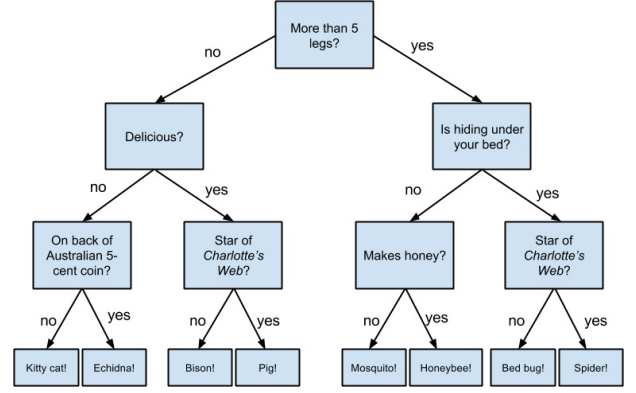

Pohon keputusan memiliki banyak hal untuk direkomendasikan. Mereka sangat mudah dimengerti dan ditafsirkan, dan
Proses di mana mereka mencapai prediksi benar-benar transparan. Berbeda dengan model lain yang kami miliki
Melihat sejauh ini, pohon keputusan dapat dengan mudah menangani campuran numerik (misalnya, jumlah kaki) dan
atribut kategoris (misalnya, delicious/not delicious) dan bahkan dapat mengklasifikasikan data untuk atribut mana
hilang.

Pada saat yang sama, menemukan pohon keputusan "optimal" untuk satu set data pelatihan secara komputasi adalah
masalah yang sangat sulit. (Kita akan menyiasatinya dengan mencoba membangun pohon yang cukup baik dari pada Yang optimal, meskipun untuk kumpulan data besar ini masih bisa menjadi banyak pekerjaan.) Lebih penting lagi, ini sangat mudah (dan sangat buruk) untuk membangun pohon keputusan yang terlalu sesuai dengan data pelatihan, dan yang tidak menggeneralisasi baik untuk data yang tidak terlihat. Kami akan mencari cara untuk mengatasi hal ini.

Kebanyakan orang membagi pohon keputusan menjadi pohon klasifikasi (yang menghasilkan output kategoris) dan pohon regresi (yang menghasilkan output numerik). Dalam bab ini, kita akan fokus pada pohon klasifikasi, dan kami akan bekerja melalui algoritma ID3 untuk mempelajari pohon keputusan dari sekumpulan data berlabel, yang seharusnya membantu kita memahami bagaimana pohon keputusan benar-benar bekerja. Untuk mempermudah, kami akan membatasi diri kita pada masalah dengan output biner seperti "Haruskah saya mempekerjakan kandidat ini?" atau "Haruskah saya tampilkan iklan pengunjung situs web ini A atau iklan B?" atau "Apakah makan makanan ini saya temukan di kulkas kantor membuatku sakit?"















## Entropi

Untuk membangun pohon keputusan, kita perlu memutuskan pertanyaan apa yang akan diajukan dan dalam urutan apa. Di
Setiap tahap pohon ada beberapa kemungkinan yang telah kita hilangkan dan beberapa yang belum. Sesudah Belajar bahwa seekor hewan tidak memiliki lebih dari lima kaki, kami telah menghilangkan kemungkinan bahwa itu adalah belalang. Kami belum menghilangkan kemungkinan bahwa itu bebek. Setiap partisi pertanyaan yang mungkin kemungkinan yang tersisa sesuai dengan jawabannya.

Idealnya, kami ingin memilih pertanyaan yang jawabannya memberikan banyak informasi tentang apa pohon kami harus memprediksi. Jika ada satu pertanyaan ya/tidak yang jawabannya selalu sesuai dengan jawaban "ya" Output yang benar dan jawaban "tidak" untuk output yang salah (atau sebaliknya), ini akan menjadi pertanyaan yang luar biasa untuk memilih. Sebaliknya, pertanyaan ya / tidak yang tidak ada jawaban memberi Anda banyak informasi baru Tentang apa prediksi seharusnya mungkin bukan pilihan yang baik.

Kami menangkap gagasan tentang "berapa banyak informasi" dengan entropi. Anda mungkin pernah mendengar istilah ini
digunakan untuk berarti gangguan. Kami menggunakannya untuk mewakili ketidakpastian yang terkait dengan data.

Bayangkan bahwa kita memiliki satu set S data, masing-masing anggota yang diberi label sebagai milik salah satu yang terbatas jumlah kelas $c_1,..c_n$. Jika semua titik data milik satu kelas, maka tidak ada yang nyata ketidak pastian, yang berarti kita ingin ada entropi rendah. Jika titik data tersebar merata Di seluruh kelas, ada banyak ketidakpastian dan kami ingin ada entropi tinggi.

Dalam istilah matematika, $p_i$ jika pi adalah proporsi data yang diberi label sebagai kelas $c_i$ , kami mendefinisikan entropi sebagai:

$$ H(S)= -p_i log_2pi-...-p_n log_2pn$$

dengan konvensi (standar) yang 0 log 0 = 0.
Tanpa terlalu khawatir tentang detail mengerikan, setiap istilah $-p_i log_2pi$ tidak negatif dan mendekati 0 tepatnya ketika $p_i$ mendekati 0 atau mendekati 1 (Gambar 17-2).

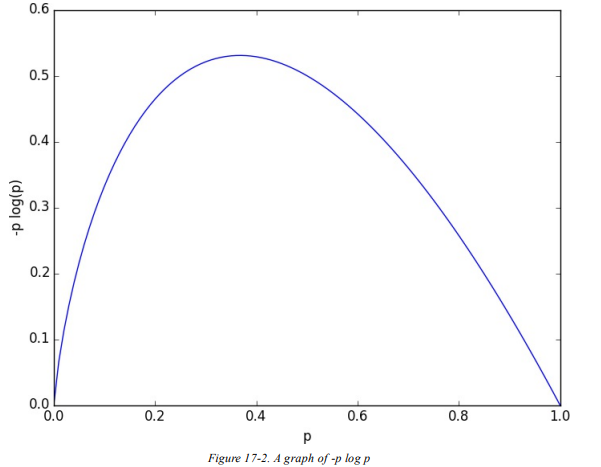

Ini berarti entropi akan menjadi kecil ketika setiap $p_i$ mendekati 0 atau 1 (i.e., ketika sebagian besar data dalam
satu kelas), dan itu akan lebih besar ketika banyak $p_i$'s tidak mendekati 0 (i.e., ketika data tersebar di beberapa kelas). Inilah perilaku yang kita inginkan.

Cukup mudah untuk menggulung semua ini menjadi fungsi:



In [ ]:
from typing import List
import math

def entropy(class_probabilities: List[float]) -> float:
    """Given a list of class probabilities, compute the entropy"""
    return sum(-p * math.log(p, 2)
                for p in class_probabilities
                if p > 0)                   # ignore zero probabilities

assert entropy([1.0]) == 0
assert entropy([0.5, 0.5]) == 1
assert 0.81 < entropy([0.25, 0.75]) < 0.82

Data kita akan terdiri dari pasangan (input, label), yang berarti bahwa kita perlu menghitung kelas probabilitas diri kita sendiri. Perhatikan bahwa kami sebenarnya tidak peduli label mana yang terkait dengan masing-masing label Probabilitas, hanya apa probabilitasnya:

In [ ]:
from typing import Any
from collections import Counter

def class_probabilities(labels: List[Any]) -> List[float]:
    total_count = len(labels)
    return [count / total_count
            for count in Counter(labels).values()]

def data_entropy(labels: List[Any]) -> float:
  return entropy(class_probabilities(labels))

assert data_entropy(['a']) == 0
assert data_entropy([True, False]) == 1
assert data_entropy([3, 4, 4, 4]) == entropy([0.25, 0.75])


## Entropi Partisi

Apa yang telah kami lakukan sejauh ini adalah menghitung entropi (pikirkan "ketidakpastian") dari satu set data berlabel. Sekarang, setiap tahap pohon keputusan melibatkan mengajukan pertanyaan yang jawabannya mempartisi data menjadi satu atau (semoga) lebih banyak himpunan bagian. Misalnya, partisi pertanyaan "apakah memiliki lebih dari lima kaki?" hewan menjadi mereka yang memiliki lebih dari lima kaki (misalnya, laba-laba) dan mereka yang tidak(misalnya, echidna).

Sejalan dengan itu, kami ingin beberapa gagasan tentang entropi yang dihasilkan dari partisi satu set data dalam cara tertentu. Kami ingin partisi memiliki entropi rendah jika membagi data menjadi subset itu sendiri memiliki entropi rendah (yaitu, sangat pasti), dan entropi tinggi jika mengandung himpunan bagian yang (besar dan) memiliki entropi tinggi (yaitu, sangat tidak pasti).

Misalnya, pertanyaan "koin lima sen Australia" saya cukup bodoh (meskipun cukup beruntung!), Karena itu mempartisi hewan yang tersisa pada saat itu menjadi $s_1=$ {Ekhidna} dan $s_2=$ {segalasesuatu yang lain} dimana $s_2=$ {Kelas}.

Secara matematis, jika kita mempartisi data S kita menjadi subset $s_1,...,s_m$ mengandung proporsi $q_1,...,q_m$ dari data, Kemudian kita menghitung entropi partisi sebagai jumlah tertimbang: $$ H = q_{1} H(s_{1})+...+q_m H (s_m)$$

yang dapat kita terapkan sebagai:



In [ ]:
def partition_entropy(subsets: List[List[Any]]) -> float:
    """Returns the entropy from this partition of data into subsets"""
    total_count = sum(len(subset) for subset in subsets)

return sum(data_entropy(subset) * len(subset) / total_count
            for subset in subsets)

NOTE

---

Satu masalah dengan pendekatan ini adalah bahwa partisi oleh atribut dengan banyak nilai yang berbeda akan menghasilkan sangat rendah entropi karena overfitting. Misalnya, bayangkan Anda bekerja untuk bank dan mencoba membangun pohon keputusan untuk memprediksi mana pelanggan Anda cenderung gagal membayar hipotek mereka, menggunakan beberapa data historis sebagai set pelatihan Anda. Bayangkan lebih jauh bahwa himpunan data berisi nomor Jaminan Sosial setiap pelanggan. Partisi pada SSN akan menghasilkan subset satu orang, Masing-masing harus memiliki entropi nol. Tetapi model yang mengandalkan SSN pasti tidak akan menggeneralisasi di luar pelatihan mengeset. Untuk alasan ini, Anda mungkin harus mencoba menghindari (atau bucket, jika sesuai) atribut dengan sejumlah besar kemungkinan nilai saat membuat pohon keputusan.

---





## Membuat Pohon Keputusan

VP memberi Anda data orang yang diwawancarai, yang terdiri dari (sesuai spesifikasi Anda) NamedTuple atribut yang relevan untuk setiap kandidat — levelnya, bahasa pilihannya, apakah dia aktif di Twitter, apakah dia memiliki gelar PhD, dan apakah dia mewawancarai dengan baik:

In [ ]:
from typing import NamedTuple, Optional

class Candidate(NamedTuple):
    level: str
    lang: str
    tweets: bool
    phd: bool
    did_well: Optional[bool] = None # allow unlabeled data

                  # level lang tweets phd did_well
inputs = [Candidate('Senior', 'Java', False, False, False),
          Candidate('Senior', 'Java', False, True, False),
          Candidate('Mid', 'Python', False, False, True),
          Candidate('Junior', 'Python', False, False, True),
          Candidate('Junior', 'R', True, False, True),
          Candidate('Junior', 'R', True, True, False),
          Candidate('Mid', 'R', True, True, True),
          Candidate('Senior', 'Python', False, False, False),
          Candidate('Senior', 'R', True, False, True),
          Candidate('Junior', 'Python', True, False, True),
          Candidate('Senior', 'Python', True, True, True),
          Candidate('Mid', 'Python', False, True, True),
          Candidate('Mid', 'Java', True, False, True),
          Candidate('Junior', 'Python', False, True, False)
        ]


Pohon kita akan terdiri dari simpul keputusan (yang mengajukan pertanyaan dan mengarahkan kita secara berbeda tergantung pada jawabannya) dan simpul daun (yang memberi kita prediksi). Kami akan membangunnya menggunakan yang relatif sederhana Algoritma ID3, yang beroperasi dengan cara berikut. Katakanlah kita diberi beberapa data berlabel, dan
Daftar atribut yang perlu dipertimbangkan untuk bercabang:

*   Jika semua data memiliki label yang sama, buat simpul daun yang memprediksi label itu lalu hentikan.
*   Jika daftar atribut kosong (yaitu, tidak ada lagi pertanyaan yang mungkin untuk diajukan), buat simpul daun
*   Jika tidak, coba partisi data dengan masing-masing atribut.
*   Pilih partisi dengan entropi partisi terendah
*   Tambahkan simpul keputusan berdasarkan atribut yang dipilih.
*   Berulang pada setiap subset yang dipartisi menggunakan atribut yang tersisa.

Inilah yang dikenal sebagai algoritma "serakah" karena, pada setiap langkah, ia memilih yang paling cepat pilihan terbaik. Dengan dataset, mungkin ada pohon yang lebih baik dengan langkah pertama yang tampak lebih buruk. Jika demikian, ini algoritma tidak akan menemukannya. Meskipun demikian, relatif mudah dipahami dan diterapkan, yang membuatnya Tempat yang bagus untuk mulai menjelajahi pohon keputusan.

Mari kita secara manual melalui langkah-langkah ini pada dataset orang yang diwawancarai. Himpunan data memiliki True dan Label palsu, dan kami memiliki empat atribut yang dapat kami bagi. Jadi langkah pertama kita adalah menemukan partisi dengan entropi paling sedikit. Kita akan mulai dengan menulis fungsi yang melakukan partisi:


In [ ]:
from typing import Dict, TypeVar
from collections import defaultdict

T = TypeVar('T') # generic type for inputs

def partition_by(inputs: List[T], attribute: str) -> Dict[Any, List[T]]:
    """Partition the inputs into lists based on the specified attribute."""
    partitions: Dict[Any, List[T]] = defaultdict(list)
    for input in inputs:
        key = getattr(input, attribute) # value of the specified attribute
        partitions[key].append(input) # add input to the correct partition
    return partitions

dan yang menggunakannya untuk menghitung entropi:

In [ ]:
def partition_entropy_by(inputs: List[Any],
                          attribute: str,
                          label_attribute: str) -> float:
    """Compute the entropy corresponding to the given partition"""
    # partitions consist of our inputs
    partitions = partition_by(inputs, attribute)

    # but partition_entropy needs just the class labels
    labels = [[getattr(input, label_attribute) for input in partition]
    for partition in partitions.values()]

    return partition_entropy(labels)

Maka kita hanya perlu menemukan partisi entropi minimum untuk seluruh dataset:

In [ ]:
for key in ['level','lang','tweets','phd']:
    print(key, partition_entropy_by(inputs, key, 'did_well'))
assert 0.69 < partition_entropy_by(inputs, 'level', 'did_well') < 0.70
assert 0.86 < partition_entropy_by(inputs, 'lang', 'did_well') < 0.87
assert 0.78 < partition_entropy_by(inputs, 'tweets', 'did_well') < 0.79
assert 0.89 < partition_entropy_by(inputs, 'phd', 'did_well') < 0.90


Entropi terendah berasal dari pemisahan pada level, jadi kita harus membuat subtree untuk setiap kemungkinan nilai level. Setiap kandidat Mid diberi label Benar, yang berarti bahwa subpohon Mid hanyalah sebuah daun node memprediksi Benar. Untuk kandidat Senior, kami memiliki campuran Benar dan Salah, jadi kami perlu Pisahkan lagi:

In [ ]:
senior_inputs = [input for input in inputs if input.level == 'Senior']

assert 0.4 == partition_entropy_by(senior_inputs, 'lang', 'did_well')
assert 0.0 == partition_entropy_by(senior_inputs, 'tweets', 'did_well')
assert 0.95 < partition_entropy_by(senior_inputs, 'phd', 'did_well') < 0.96

Ini menunjukkan kepada kita bahwa perpecahan kita berikutnya harus pada tweet, yang menghasilkan partisi entropi nol. Bagi
kandidat tingkat Senior ini, tweet "ya" selalu menghasilkan True sementara tweet "tidak" selalu menghasilkan dalam Salah.

Gambar 17-3 menunjukkan pohon keputusan lengkap

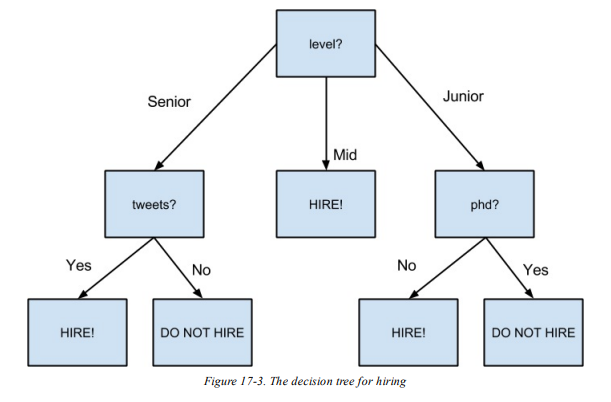

## Menyatukan Semuanya

Sekarang kita telah melihat bagaimana algoritma bekerja, kita ingin menerapkannya secara lebih umum. Ini berarti kita perlu memutuskan bagaimana kita ingin mewakili pohon. Kami akan menggunakan cukup banyak yang paling ringan representasi mungkin. Kami mendefinisikan pohon menjadi:

*   Sebuah daun(yang memprediksi nilai tunggal), atau
*   Perpecahan (berisi atribut untuk dipisahkan, subpohon untuk nilai tertentu dari atribut tersebut, dan
mungkin nilai default untuk digunakan jika kita melihat nilai yang tidak diketahui).



In [ ]:
from typing import NamedTuple, Union, Any


class Leaf(NamedTuple):
    value: Any


class Split(NamedTuple):
    attribute: str
    subtrees: dict
    default_value: Any = None


DecisionTree = Union[Leaf, Split]

Dengan representasi ini, pohon perekrutan kami akan terlihat seperti:

In [ ]:
hiring_tree = Split('level', {  # first, consider "level"
    'Junior': Split('phd', {    # if level is "Junior", next look at "phd"
        False: Leaf(True),      # if "phd" is False, predict True
        True: Leaf(False)       # if "phd" is True, predict False
    }),
    'Mid': Leaf(True),          # if level is "Mid", just predict True
    'Senior': Split('tweets', { # if level is "Senior", look at "tweets"
        False: Leaf(False),     # if "tweets" is False, predict False
        True: Leaf(True)        # if "tweets" is True, predict True
    })
})

Masih ada pertanyaan tentang apa yang harus dilakukan jika kita menemukan nilai atribut yang tidak terduga (atau hilang). Apa yang harus dilakukan pohon perekrutan kita jika bertemu dengan kandidat yang levelnya Magang? Kami akan menangani ini kasus dengan mengisi atribut default_value dengan label yang paling umum.

Dengan representasi seperti itu, kita dapat mengklasifikasikan input dengan:

In [ ]:
def classify(tree: DecisionTree, input: Any) -> Any:
    """classify the input using the given decision tree"""


    # If this is a leaf node, return its value
    if isinstance(tree, Leaf):
        return tree.value


    # Otherwise this tree consists of an attribute to split on
    # and a dictionary whose keys are values of that attribute
    # and whose values are subtrees to consider next
    subtree_key = getattr(input, tree.attribute)


    if subtree_key not in tree.subtrees:  # If no subtree for key,
        return tree.default_value         # return the default value.


    subtree = tree.subtrees[subtree_key]  # Choose the appropriate subtree
    return classify(subtree, input)       # and use it to classify the input.

Yang tersisa hanyalah membangun representasi pohon dari data pelatihan kami:

In [ ]:
def build_tree_id3(inputs: List[Any],
                    split_attributes: List[str],
                    target_attribute: str) -> DecisionTree:
    # Count target labels
    label_counts = Counter(getattr(input, target_attribute)
                            for input in inputs)
    most_common_label = label_counts.most_common(1)[0][0]


    # If there's a unique label, predict it
    if len(label_counts) == 1:
        return Leaf(most_common_label)


    # If no split attributes left, return the majority label
    if not split_attributes:
        return Leaf(most_common_label)


    # Otherwise split by the best attribute


    def split_entropy(attribute: str) -> float:
        """Helper function for finding the best attribute"""
        return partition_entropy_by(inputs, attribute, target_attribute)


    best_attribute = min(split_attributes, key=split_entropy)


    partitions = partition_by(inputs, best_attribute)
    new_attributes = [a for a in split_attributes if a != best_attribute]


    # Recursively build the subtrees
    subtrees = {attribute_value : build_tree_id3(subset,
                                                  new_attributes,
                                                  target_attribute)
                for attribute_value, subset in partitions.items()}


return Split(best_attribute, subtrees, default_value=most_common_label)


Di pohon yang kami bangun, setiap daun seluruhnya terdiri dari input Benar atau seluruhnya dari input Palsu. Ini berarti pohon memprediksi dengan sempurna pada himpunan data pelatihan. Tapi kita juga bisa menerapkannya pada data baru yang tidak ada di set pelatihan:

In [ ]:
tree = build_tree_id3(inputs,
                      ['level', 'lang', 'tweets', 'phd'],
                      'did_well')

# Should predict True
assert classify(tree, Candidate("Junior", "Java", True, False))

# Should predict False
assert not classify(tree, Candidate("Junior", "Java", True, True))

Dan juga untuk data dengan nilai yang tidak terduga:

In [ ]:
# Should predict True
assert classify(tree, Candidate("Intern", "Java", True, True))

NOTE

---
Karena tujuan kami terutama untuk menunjukkan cara membangun pohon, kami membangun pohon menggunakan seluruh dataset. Seperti biasa, jika kita Jika benar-benar mencoba membuat model yang baik untuk sesuatu, kami akan mengumpulkan lebih banyak data dan membaginya menjadi melatih / validasi / menguji subset.

---





## Hutan Acak

Mengingat seberapa dekat pohon keputusan dapat menyesuaikan diri dengan data pelatihan mereka, tidak mengherankan bahwa mereka memiliki kecenderungan untuk overfit. Salah satu cara untuk menghindari ini adalah teknik yang disebut hutan acak, di mana Kami membangun beberapa pohon keputusan dan menggabungkan outputnya. Jika mereka pohon klasifikasi, kita mungkin biarkan mereka memilih; Jika mereka pohon regresi, kita mungkin rata-rata prediksi mereka.

Proses pembangunan pohon kami bersifat deterministik, jadi bagaimana kami mendapatkan pohon secara acak?

Satu bagian melibatkan data bootstrapping (ingat "Digression: The Bootstrap"). Daripada berlatih
Setiap pohon pada semua input dalam set pelatihan, kami melatih setiap pohon pada hasil bootstrap_sample(masukan). Karena setiap pohon dibangun menggunakan data yang berbeda, setiap pohon akan berbeda dari setiap pohon lainnya. (Manfaat sampingan adalah bahwa itu benar-benar adil untuk menggunakan data nonsampled untuk menguji masing-masing
pohon, yang berarti Anda bisa lolos dengan menggunakan semua data Anda sebagai set pelatihan jika Anda pintar bagaimana Anda mengukur kinerja.) Teknik ini dikenal sebagai bootstrap aggregating atau bagging.

Sumber keacakan kedua melibatkan perubahan cara kita memilih best_attribute untuk dibagi di atas. Daripada melihat semua atribut yang tersisa, pertama-tama kita memilih subset acak dari mereka dan Kemudian pisahkan mana yang terbaik:

In [ ]:
# if there are already few enough split candidates, look at all of them
if len(split_candidates) <= self.num_split_candidates:
    sampled_split_candidates = split_candidates
# otherwise pick a random sample
else:
    sampled_split_candidates = random.sample(split_candidates,
                                            self.num_split_candidates)
# now choose the best attribute only from those candidates
best_attribute = min(sampled_split_candidates, key=split_entropy)

partitions = partition_by(inputs, best_attribute)

Ini adalah contoh teknik yang lebih luas yang disebut pembelajaran ansambel di mana kami menggabungkan beberapa
Pembelajar yang lemah (biasanya bias tinggi, model varians rendah) untuk menghasilkan keseluruhan yang kuat pola.


## Untuk Eksplorasi Lebih Lanjut


*   Scikit-learn memiliki banyak model pohon keputusan. Ini juga memiliki modul ansambel yang mencakup RandomForestClassifier serta metode ansambel lainnya.

*   XGBoost adalah perpustakaan untuk melatih gradien didorong pohon keputusan yang cenderung memenangkan banyak
Kompetisi pembelajaran mesin bergaya Kaggle.

*   Kami baru saja menggores permukaan pohon keputusan dan algoritmanya. Wikipedia adalah Titik awal yang baik untuk eksplorasi yang lebih luas.




